# Climate Weather Surface of Brazil - Hourly
## Hourly Climate data from 122 weathes stations between 2000 and 2021

### About Dataset

#### Context
It's covers hourly weather data from 623 inmet weathers stations of Brazil.

Dataset Source: INMET (National Meteorological Institute - Brazil).

Equipament: Vaisala Automatic Weather Station AWS310

Category: Weather

#### Content
Data:

Date (YYYY-MM-DD) \
Time (HH:00) \
Amount of precipitation in millimetres (last hour) \
Atmospheric pressure at station level (mb) \
Maximum air pressure for the last hour (mb) \
Minimum air pressure for the last hour (mb) \
Solar radiation (KJ/m2) \
Air temperature (instant) (°c) \
Dew point temperature (instant) (°c) \
Maximum temperature for the last hour (°c) \
Minimum temperature for the last hour (°c) \
Maximum dew point temperature for the last hour (°c) \
Minimum dew point temperature for the last hour (°c) \
Maximum relative humid temperature for the last hour (%) \
Minimum relative humid temperature for the last hour (%) \
Relative humid (% instant) \
Wind direction (radius degrees (0-360)) \
Wind gust in metres per second \
Wind speed in metres per second \
Brazilian geopolitical regions \
State (Province) \
Station Name (usually city location or nickname) \
Station code (INMET number) \
Latitude \
Longitude \
Elevation \

NOTE: Not all weather stations started operating since 2000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset jest podzielony na kilka plików (każdy odpowiada innemu regionowi Brazylii), ze względu na ogromną ilość danych i inne warunki pogodowe, bierzemy pod uwagę jeden region

In [2]:
# plik ma nazwy kolumn po Brazylijsku, więc je nadpisujemy
# dataset jest duży, więc ignorujemy jego znaczną część

data1 = pd.read_csv(
    "northeast.csv", na_values=["-9999.0"], 
#     header=0, index_col=0, skiprows=16000000,
    header=0, index_col=0, skiprows=15500000,
#     header=0, index_col=0,
    names=[
        'date', 
        'hr', 
        'prcp', 
        'stp', 
        'smax',
        'smin', 
        'gbrd', 
        'temp', 
        'dewp', 
        'tmax',
        'tmin', 
        'dmax',
        'dmin', 
        'hmax',
        'hmin',
        'hmdy',
        'wdct',
        'gust',
        'wdsp',
        'region',
        'state',
        'station',
        'station_code',
        'lat',
        'long',
        'height'
    ])
display(data1.head())

,date,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,...,wdct,gust,wdsp,region,state,station,station_code,lat,long,height
268802,2020-09-01,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268803,2020-09-01,22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268804,2020-09-01,23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268805,2020-09-02,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268806,2020-09-02,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62


In [3]:
# data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
data = data1

In [4]:
print("Ilość rekordów:",data.shape[0])

Ilość rekordów: 760936


In [5]:
data.head()

,date,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,...,wdct,gust,wdsp,region,state,station,station_code,lat,long,height
268802,2020-09-01,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268803,2020-09-01,22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268804,2020-09-01,23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268805,2020-09-02,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62
268806,2020-09-02,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NE,MA,PREGUICAS,A218,-2.592341,-42.707553,4.62


In [6]:
data.describe()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp,lat,long,height
count,354866.000000,445969.000000,445583.000000,445583.000000,258062.000000,445018.000000,415681.00000,442150.000000,444617.000000,414679.000000,414230.000000,415446.000000,414912.000000,416052.000000,420788.000000,420096.000000,420802.000000,760936.000000,760936.000000,760936.000000
mean,0.137186,976.541076,976.769706,976.229359,1453.214379,25.886785,19.41777,26.499634,25.262349,19.939587,18.905038,73.375579,67.843379,70.618418,143.230368,5.169690,2.116383,-8.556301,-40.128008,280.115381
std,1.239988,29.016462,29.023245,29.018714,1165.035508,4.030422,3.85804,4.211006,3.829627,3.847888,3.908563,19.376327,20.573204,20.066765,85.118991,3.001998,1.637023,3.787549,3.191300,242.237969
min,0.000000,865.000000,865.900000,865.400000,0.000000,10.400000,-10.00000,10.700000,10.300000,-10.000000,-10.000000,7.000000,7.000000,7.000000,1.000000,0.000000,0.000000,-17.963016,-47.459839,3.720000
25%,0.000000,962.000000,962.000000,961.400000,312.000000,23.100000,17.70000,23.500000,22.700000,18.200000,17.100000,61.000000,53.000000,57.000000,86.000000,2.800000,0.800000,-10.984722,-42.252500,84.850000
50%,0.000000,981.000000,980.800000,980.200000,1347.000000,25.500000,20.20000,26.100000,25.000000,20.700000,19.700000,77.000000,70.000000,74.000000,124.000000,5.100000,1.900000,-8.059280,-39.558056,232.290000
75%,0.000000,1002.000000,1001.900000,1001.400000,2403.000000,28.700000,22.10000,29.600000,27.800000,22.500000,21.600000,89.000000,85.000000,88.000000,185.000000,7.300000,3.100000,-5.555723,-37.766667,421.440000
max,89.200000,1024.000000,1024.500000,1024.200000,6776.000000,40.800000,34.70000,41.000000,39.200000,35.100000,32.100000,100.000000,100.000000,100.000000,360.000000,40.100000,18.900000,0.916877,-29.345904,1283.950000


In [7]:
# Sprawdzamy ilość null-i

In [8]:
data.isnull().sum()

date                 0
hr                   0
prcp            406070
stp             314967
smax            315353
smin            315353
gbrd            502874
temp            315918
dewp            345255
tmax            318786
tmin            316319
dmax            346257
dmin            346706
hmax            345490
hmin            346024
hmdy            344884
wdct            340148
gust            340840
wdsp            340134
region               0
state                0
station              0
station_code         0
lat                  0
long                 0
height               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760936 entries, 268802 to 352795
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          760936 non-null  object 
 1   hr            760936 non-null  object 
 2   prcp          354866 non-null  float64
 3   stp           445969 non-null  float64
 4   smax          445583 non-null  float64
 5   smin          445583 non-null  float64
 6   gbrd          258062 non-null  float64
 7   temp          445018 non-null  float64
 8   dewp          415681 non-null  float64
 9   tmax          442150 non-null  float64
 10  tmin          444617 non-null  float64
 11  dmax          414679 non-null  float64
 12  dmin          414230 non-null  float64
 13  hmax          415446 non-null  float64
 14  hmin          414912 non-null  float64
 15  hmdy          416052 non-null  float64
 16  wdct          420788 non-null  float64
 17  gust          420096 non-null  float64
 18 

In [10]:
# Patrzymy na dane kategoryczne

In [11]:
data["state"].value_counts()

BA    240768
MA     95741
PI     95373
CE     90000
PE     72899
RN     61056
AL     41451
PB     34704
SE     28944
Name: state, dtype: int64

In [12]:
data["region"].value_counts()

NE    760936
Name: region, dtype: int64

In [13]:
data["station"].value_counts()

VALENCA DO PIAUI        11664
BARREIRAS               11664
SANTA RITA DE CASSIA    11664
SANTA CRUZ              11664
PIATA                   11664
                        ...  
ITAPETINGA               2880
CAROLINA                 2880
CARAVELAS                2880
PIRANHAS                 2880
FLORIANO                 2880
Name: station, Length: 146, dtype: int64

In [14]:
data["station_code"].value_counts()

A363    11664
A402    11664
A415    11664
A367    11664
A430    11664
        ...  
A446     2880
A205     2880
A405     2880
A371     2880
A311     2880
Name: station_code, Length: 146, dtype: int64

In [15]:
# Większość z nim albo nie ma dla nas znaczenia, albo opisuje to samo
# lat, long, height i station może być wyrażone tylko za pomocą station_code (opisuje to samo miejsce)
# dane demogrficzne, typu nazwa stanu lub regionu nie mają dla nas znaczenia
data = data.drop(['region', 'state', 'station', 'lat', 'long', 'height'], axis=1)

In [16]:
data.head()

,date,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp,station_code
268802,2020-09-01,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A218
268803,2020-09-01,22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A218
268804,2020-09-01,23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A218
268805,2020-09-02,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A218
268806,2020-09-02,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A218


In [17]:
# usuwamy te rekordy, gdzie nie mamy informacji o opadach
data = data.dropna(subset=['prcp'])

In [18]:
# Pozostałe nulle, którymi musimy się zająć
data.isnull().sum()

date                 0
hr                   0
prcp                 0
stp                 12
smax               246
smin               246
gbrd            149656
temp               791
dewp             23826
tmax              3504
tmin              1037
dmax             24581
dmin             24952
hmax             23858
hmin             24283
hmdy             23463
wdct             22835
gust             23305
wdsp             22821
station_code         0
dtype: int64

In [19]:
# podobnie usuwamy rekordy gdzie brakuje wiekszosci danych (musi byc wypelnionych przynajmniej 17 pol)
# czyli usuwany dane z określonych dat/godzin zanim stacja zaczęła funkcjonować
data = data.dropna(thresh=17)
print("Pozostała ilość rekordów:", data.shape[0])

Pozostała ilość rekordów: 321929


In [20]:
data.isnull().sum()

date                 0
hr                   0
prcp                 0
stp                  4
smax                 0
smin                 0
gbrd            126416
temp                10
dewp               610
tmax              1692
tmin                 0
dmax               232
dmin               403
hmax                 0
hmin                42
hmdy               478
wdct             14054
gust             14299
wdsp             14042
station_code         0
dtype: int64

In [21]:
# pozostale nulle zastepujemy mediana
medians = data.median(skipna=True)
print(medians)

data['stp'] = data['stp'].fillna(medians[1])
data['smax'] = data['smax'].fillna(medians[2])
data['smin'] = data['smin'].fillna(medians[3])
data['gbrd'] = data['gbrd'].fillna(medians[4])
data['temp'] = data['temp'].fillna(medians[5])
data['dewp'] = data['dewp'].fillna(medians[6])
data['tmax'] = data['tmax'].fillna(medians[7])
data['tmin'] = data['tmin'].fillna(medians[8])
data['dmax'] = data['dmax'].fillna(medians[9])
data['dmin'] = data['dmin'].fillna(medians[10])
data['hmax'] = data['hmax'].fillna(medians[11])
data['hmin'] = data['hmin'].fillna(medians[12])
data['hmdy'] = data['hmdy'].fillna(medians[13])
data['wdct'] = data['wdct'].fillna(medians[14])
data['gust'] = data['gust'].fillna(medians[15])
data['wdsp'] = data['wdsp'].fillna(medians[16])

prcp       0.0
stp      976.0
smax     976.5
smin     975.9
gbrd    1355.0
temp      25.6
dewp      20.0
tmax      26.3
tmin      25.0
dmax      20.5
dmin      19.5
hmax      76.0
hmin      69.0
hmdy      73.0
wdct     123.0
gust       5.1
wdsp       1.9
dtype: float64


C:\Users\Names\AppData\Local\Temp\ipykernel_12028\243384962.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = data.median(skipna=True)


In [22]:
data.isnull().sum()

date            0
hr              0
prcp            0
stp             0
smax            0
smin            0
gbrd            0
temp            0
dewp            0
tmax            0
tmin            0
dmax            0
dmin            0
hmax            0
hmin            0
hmdy            0
wdct            0
gust            0
wdsp            0
station_code    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321929 entries, 262066 to 352795
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          321929 non-null  object 
 1   hr            321929 non-null  object 
 2   prcp          321929 non-null  float64
 3   stp           321929 non-null  float64
 4   smax          321929 non-null  float64
 5   smin          321929 non-null  float64
 6   gbrd          321929 non-null  float64
 7   temp          321929 non-null  float64
 8   dewp          321929 non-null  float64
 9   tmax          321929 non-null  float64
 10  tmin          321929 non-null  float64
 11  dmax          321929 non-null  float64
 12  dmin          321929 non-null  float64
 13  hmax          321929 non-null  float64
 14  hmin          321929 non-null  float64
 15  hmdy          321929 non-null  float64
 16  wdct          321929 non-null  float64
 17  gust          321929 non-null  float64
 18 

In [24]:
data.describe()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp
count,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000
mean,0.132762,973.221608,973.454855,972.909963,1412.990445,25.965979,19.168960,26.596658,25.316963,19.726319,18.655436,72.790941,67.098345,69.860121,139.128640,5.240913,2.130079
std,1.226127,30.731061,30.737863,30.723507,907.902161,4.182204,4.031003,4.345986,3.981500,3.995272,4.072172,19.604386,20.798260,20.288464,81.662468,2.819915,1.498585
min,0.000000,865.000000,865.900000,865.400000,0.000000,10.400000,-10.000000,10.700000,10.300000,-10.000000,-10.000000,7.000000,7.000000,7.000000,1.000000,0.000000,0.000000
25%,0.000000,959.000000,959.400000,958.800000,967.000000,23.100000,17.300000,23.600000,22.700000,17.900000,16.700000,60.000000,52.000000,56.000000,88.000000,3.100000,1.000000
50%,0.000000,976.000000,976.500000,975.900000,1355.000000,25.600000,20.000000,26.300000,25.000000,20.500000,19.500000,76.000000,69.000000,73.000000,123.000000,5.100000,1.900000
75%,0.000000,996.000000,996.700000,996.100000,1728.000000,29.000000,21.900000,29.800000,28.100000,22.400000,21.500000,89.000000,85.000000,87.000000,172.000000,7.200000,3.100000
max,89.200000,1020.000000,1020.200000,1020.000000,6776.000000,40.800000,32.800000,41.000000,39.200000,35.100000,32.100000,100.000000,100.000000,100.000000,360.000000,40.100000,12.900000


In [25]:
# dla kolumny prcp nadajemy wartosci T albo F, w zaleznosci od tego czy padalo, nie interesuje nas intensywnosc opadow
data.loc[data['prcp'] > 0, "prcp"] = 1
data.loc[data['prcp'] == 0, "prcp"] = 0
data = data.reset_index()

In [26]:
data.describe()

,index,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp
count,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000
mean,233827.860665,0.066403,973.221608,973.454855,972.909963,1412.990445,25.965979,19.168960,26.596658,25.316963,19.726319,18.655436,72.790941,67.098345,69.860121,139.128640,5.240913,2.130079
std,117366.299109,0.248985,30.731061,30.737863,30.723507,907.902161,4.182204,4.031003,4.345986,3.981500,3.995272,4.072172,19.604386,20.798260,20.288464,81.662468,2.819915,1.498585
min,0.000000,0.000000,865.000000,865.900000,865.400000,0.000000,10.400000,-10.000000,10.700000,10.300000,-10.000000,-10.000000,7.000000,7.000000,7.000000,1.000000,0.000000,0.000000
25%,131379.000000,0.000000,959.000000,959.400000,958.800000,967.000000,23.100000,17.300000,23.600000,22.700000,17.900000,16.700000,60.000000,52.000000,56.000000,88.000000,3.100000,1.000000
50%,282860.000000,0.000000,976.000000,976.500000,975.900000,1355.000000,25.600000,20.000000,26.300000,25.000000,20.500000,19.500000,76.000000,69.000000,73.000000,123.000000,5.100000,1.900000
75%,330881.000000,0.000000,996.000000,996.700000,996.100000,1728.000000,29.000000,21.900000,29.800000,28.100000,22.400000,21.500000,89.000000,85.000000,87.000000,172.000000,7.200000,3.100000
max,376873.000000,1.000000,1020.000000,1020.200000,1020.000000,6776.000000,40.800000,32.800000,41.000000,39.200000,35.100000,32.100000,100.000000,100.000000,100.000000,360.000000,40.100000,12.900000


In [27]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# sprawdzamy ktore zmienne sa najbardziej powiazane

In [29]:
tmpx = data['stp']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.022179027515327847, 'spearman': 0.047571345343204785, 'kendall': 0.03908761714459347}


c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [30]:
tmpx = data['smax']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.022172733430575516, 'spearman': 0.04772238893981379, 'kendall': 0.038990106863254666}


In [31]:
tmpx = data['smin']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.02172559553887567, 'spearman': 0.046959992046939944, 'kendall': 0.03836715176223585}


In [32]:
tmpx = data['gbrd']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': -0.11604084944059503, 'spearman': -0.11714107976578132, 'kendall': -0.10090362966245975}


In [33]:
tmpx = data['temp']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': -0.15467127848074985, 'spearman': -0.16167343123562422, 'kendall': -0.13245178850688763}


In [34]:
tmpx = data['dewp']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.11874087436919514, 'spearman': 0.1371886994513931, 'kendall': 0.11250658066447411}


In [35]:
tmpx = data['tmax']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': -0.13591534969018815, 'spearman': -0.13883192964740343, 'kendall': -0.1137230204761406}


In [36]:
tmpx = data['tmin']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': -0.152136825264263, 'spearman': -0.16060004227771346, 'kendall': -0.1315995211375438}


In [37]:
tmpx = data['dmax']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.11554925791883429, 'spearman': 0.13407557203370649, 'kendall': 0.10995796434462024}


In [38]:
tmpx = data['dmin']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.11431684233558596, 'spearman': 0.12874437136869707, 'kendall': 0.10557385778733222}


In [39]:
tmpx = data['hmax']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.2153333373350016, 'spearman': 0.24029730937059465, 'kendall': 0.1978241672439579}


In [40]:
tmpx = data['hmin']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.19941354248231488, 'spearman': 0.2100364052032935, 'kendall': 0.1726994252835604}


In [41]:
tmpx = data['hmdy']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.22062465263714415, 'spearman': 0.24021700045579866, 'kendall': 0.19761322557629282}


In [42]:
tmpx = data['wdct']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.05776051441597784, 'spearman': 0.06257515799351267, 'kendall': 0.05124994883984977}


In [43]:
tmpx = data['gust']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': 0.02285348126327728, 'spearman': 0.01245965939506392, 'kendall': 0.010239895949053786}


In [44]:
tmpx = data['wdsp']
tmpy = data['prcp']
corr = {}
corr['pearson'], _ = stats.pearsonr(tmpx,tmpy)
corr['spearman'], _ = stats.spearmanr(tmpx,tmpy)
corr['kendall'], _ = stats.kendalltau(tmpx,tmpy)
print(corr)

{'pearson': -0.042162082244369056, 'spearman': -0.043992337154189945, 'kendall': -0.03638264289646001}


In [45]:
# zmieniamy dane kateryczne ze stringa na inty
data['station_label'] = data['station_code'].rank(method='dense', ascending=False).astype(int)
data = data.drop(['station_code', 'index'], axis=1)
# data = data.drop(['index'], axis=1)
data.describe()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp,station_label
count,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000,321929.000000
mean,0.066403,973.221608,973.454855,972.909963,1412.990445,25.965979,19.168960,26.596658,25.316963,19.726319,18.655436,72.790941,67.098345,69.860121,139.128640,5.240913,2.130079,55.838738
std,0.248985,30.731061,30.737863,30.723507,907.902161,4.182204,4.031003,4.345986,3.981500,3.995272,4.072172,19.604386,20.798260,20.288464,81.662468,2.819915,1.498585,31.119279
min,0.000000,865.000000,865.900000,865.400000,0.000000,10.400000,-10.000000,10.700000,10.300000,-10.000000,-10.000000,7.000000,7.000000,7.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,959.000000,959.400000,958.800000,967.000000,23.100000,17.300000,23.600000,22.700000,17.900000,16.700000,60.000000,52.000000,56.000000,88.000000,3.100000,1.000000,29.000000
50%,0.000000,976.000000,976.500000,975.900000,1355.000000,25.600000,20.000000,26.300000,25.000000,20.500000,19.500000,76.000000,69.000000,73.000000,123.000000,5.100000,1.900000,55.000000
75%,0.000000,996.000000,996.700000,996.100000,1728.000000,29.000000,21.900000,29.800000,28.100000,22.400000,21.500000,89.000000,85.000000,87.000000,172.000000,7.200000,3.100000,82.000000
max,1.000000,1020.000000,1020.200000,1020.000000,6776.000000,40.800000,32.800000,41.000000,39.200000,35.100000,32.100000,100.000000,100.000000,100.000000,360.000000,40.100000,12.900000,111.000000


In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal

df = data

In [47]:
# df=pd.concat([zeros_subset[1:500], ones_subset[1:500]], ignore_index=True)
# df.value_counts()
# sns.pairplot(df)#, kind="reg"
# plt.show()

C:\Users\Names\AppData\Local\Temp\ipykernel_12028\3097445852.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


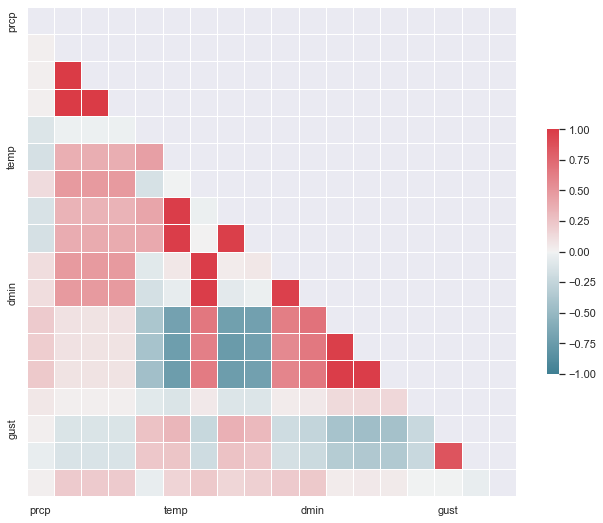

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp,station_label
prcp,1.000000,0.022179,0.022173,0.021726,-0.116041,-0.154671,0.118741,-0.135915,-0.152137,0.115549,0.114317,0.215333,0.199414,0.220625,0.057761,0.022853,-0.042162,0.021773
stp,0.022179,1.000000,0.999889,0.999905,-0.023383,0.365138,0.480004,0.338611,0.382162,0.483252,0.480118,0.088358,0.086347,0.082822,0.017325,-0.123748,-0.128619,0.211562
smax,0.022173,0.999889,1.000000,0.999952,-0.016664,0.370064,0.479166,0.343287,0.386683,0.483063,0.479089,0.084656,0.082521,0.078756,0.017055,-0.121357,-0.127062,0.211773
smin,0.021726,0.999905,0.999952,1.000000,-0.018900,0.367461,0.479323,0.340637,0.384285,0.482934,0.479452,0.086454,0.084526,0.080689,0.017119,-0.122878,-0.127917,0.211370
gbrd,-0.116041,-0.023383,-0.016664,-0.018900,1.000000,0.451300,-0.145543,0.418678,0.392360,-0.079027,-0.159748,-0.383408,-0.408508,-0.439958,-0.080359,0.260289,0.231242,-0.043262
temp,-0.154671,0.365138,0.370064,0.367461,0.451300,1.000000,-0.007118,0.980845,0.980493,0.056717,-0.047140,-0.701884,-0.727741,-0.735149,-0.121481,0.325811,0.246469,0.163822
dewp,0.118741,0.480004,0.479166,0.479323,-0.145543,-0.007118,1.000000,-0.024969,0.004491,0.981042,0.979447,0.669371,0.620962,0.647487,0.047654,-0.227228,-0.187721,0.221175
tmax,-0.135915,0.338611,0.343287,0.340637,0.418678,0.980845,-0.024969,1.000000,0.974856,0.038550,-0.070731,-0.715646,-0.755798,-0.738481,-0.116005,0.354490,0.263888,0.150056
tmin,-0.152137,0.382162,0.386683,0.384285,0.392360,0.980493,0.004491,0.974856,1.000000,0.057987,-0.031229,-0.705077,-0.710815,-0.707618,-0.115220,0.308934,0.229243,0.180049
dmax,0.115549,0.483252,0.483063,0.482934,-0.079027,0.056717,0.981042,0.038550,0.057987,1.000000,0.964109,0.632560,0.567341,0.589085,0.037550,-0.189885,-0.155964,0.217005


In [48]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

In [49]:
# porzucamy dane słabo skorelowane
data = data.drop(['stp', 'smax', 'smin', 'wdct', 'gust', 'wdsp', 'date', 'hr',], axis=1)

In [50]:
# dataset nie jest zbyt zbalansowany, mamu dużo więcej przypadków w których nie pada, niż pada
data['prcp'].value_counts()

0.0    300552
1.0     21377
Name: prcp, dtype: int64

In [51]:
import pandas as pd

# balansujemy dataset
ones_subset = data.loc[data["prcp"] == 1, :]
number_of_1s = len(ones_subset)

zeros_subset = data.loc[data["prcp"] == 0, :]
sampled_zeros = zeros_subset.sample(number_of_1s)

# wydzielamy zbior walidacyjny
val_rows = round(0.1*number_of_1s)

X_val = pd.concat([ones_subset[0:val_rows], sampled_zeros[0:val_rows]], ignore_index=True)
y_val = X_val['prcp'].values

X_val = X_val.drop(['prcp'], axis=1)

print("rzedy danych wydzielone na validation:", len(X_val))

data = pd.concat([ones_subset[val_rows:], sampled_zeros[val_rows:]], ignore_index=True)

# print(data)

rzedy danych wydzielone na validation: 4276


In [52]:
data['prcp'].describe()

count    38478.000000
mean         0.500000
std          0.500006
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: prcp, dtype: float64

In [53]:
data['prcp'].value_counts()

1.0    19239
0.0    19239
Name: prcp, dtype: int64

In [54]:
# dzielimy na train/test

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop(['prcp'], axis=1)
y = data['prcp'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [57]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [58]:
print(X_train.shape, y_train.shape)

(30782, 11) (30782,)


In [59]:
# XGB

In [60]:
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler    
from sklearn.pipeline import Pipeline

param_distribution_xgb = {
    'preprocessing': [None, StandardScaler()],
    'max_depth': randint(3, 11),
    'learning_rate': uniform(0.001, 0.1-0.001),
    'n_estimators': randint(50, 400),
    'gamma': uniform(0,2),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
    'min_child_weight': randint(1, 11)
}

In [61]:
pipe1 = XGBClassifier(n_jobs=-1)

grid_1 = RandomizedSearchCV(
    estimator=pipe1, 
    n_iter=20, 
    param_distributions=param_distribution_xgb, 
    cv=kfold, 
    return_train_score=True, 
    verbose=0)

grid_1.fit(X_train, y_train)
grid_1.best_params_
print(grid_1.best_score_)

[22:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  

[22:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  

[22:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "preprocessing" } might not be used.

  

In [62]:
# SVC z jądrem rbf albo linear

In [63]:
param_distribution_svc = {
    'preprocessing': [None, StandardScaler()],
    'classifier__C': uniform(0.001, 1000),
    'classifier__max_iter': randint(10, 400),
    'classifier__gamma': uniform(0,2),
    'classifier__kernel': ['rbf', 'linear']
}

In [64]:
from sklearn.preprocessing import StandardScaler    
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

pipe2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

grid_2 = RandomizedSearchCV(pipe2, n_iter=20, param_distributions=param_distribution_svc, cv=kfold, return_train_score=True, verbose=0)
grid_2.fit(X_train, y_train)

grid_2.best_params_
print(grid_2.best_score_)

c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=296).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=296).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=296).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=296).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\nam

c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=287).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\nam

c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=313).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=313).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=293).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=293).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\users\nam

0.6099651653511332


c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [65]:
# Keras

In [66]:
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

In [67]:
# skalujemy dane

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# wybieramy metode aktywacji

--------------
 sigmoid 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2400      
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 3ms/step - loss: 0.5664 - accuracy: 0.7137 - val_loss: 0.5428 - val_accuracy: 0.7327
Epoch 2/5

962/962 [==============================] - 2s 2ms/step - loss: 0.4720 - accuracy: 0.7712 - val_loss: 0.4772 - val_accuracy: 0.7640
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4716 - accuracy: 0.7722 - val_loss: 0.4806 - val_accuracy: 0.7622
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4719 - accuracy: 0.7717 - val_loss: 0.4792 - val_accuracy: 0.7651
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4703 - accuracy: 0.7724 - val_loss: 0.4827 - val_accuracy: 0.7634
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4708 - accuracy: 0.7727 - val_loss: 0.4758 - val_accuracy: 0.7656
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4698 - accuracy: 0.7730 - val_loss: 0.4776 - val_accuracy: 0.7648
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4691 - accuracy: 0.7740 - val_loss: 0.4866 - val_accuracy: 0.7584
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4440 - accuracy: 0.7893 - val_loss: 0.4757 - val_accuracy: 0.7752
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4441 - accuracy: 0.7888 - val_loss: 0.4688 - val_accuracy: 0.7773
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.7902 - val_loss: 0.4613 - val_accuracy: 0.7801
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4421 - accuracy: 0.7895 - val_loss: 0.4684 - val_accuracy: 0.7714
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.7902 - val_loss: 0.4619 - val_accuracy: 0.7812
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4412 - accuracy: 0.7916 - val_loss: 0.4614 - val_accuracy: 0.7826
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4415 - accuracy: 0.7912 - val_loss: 0.4667 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.4243 - accuracy: 0.7997 - val_loss: 0.4623 - val_accuracy: 0.7805
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4242 - accuracy: 0.8023 - val_loss: 0.4588 - val_accuracy: 0.7840
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4237 - accuracy: 0.8032 - val_loss: 0.4564 - val_accuracy: 0.7844
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4239 - accuracy: 0.8012 - val_loss: 0.4596 - val_accuracy: 0.7855
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4240 - accuracy: 0.8007 - val_loss: 0.4608 - val_accuracy: 0.7825
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4238 - accuracy: 0.8024 - val_loss: 0.4544 - val_accuracy: 0.7834
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4230 - accuracy: 0.8016 - val_loss: 0.4579 - val_accuracy: 0.7855

962/962 [==============================] - 2s 2ms/step - loss: 0.4122 - accuracy: 0.8089 - val_loss: 0.4518 - val_accuracy: 0.7908
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8096 - val_loss: 0.4589 - val_accuracy: 0.7842
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4115 - accuracy: 0.8104 - val_loss: 0.4567 - val_accuracy: 0.7922
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8076 - val_loss: 0.4564 - val_accuracy: 0.7861
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4118 - accuracy: 0.8091 - val_loss: 0.4635 - val_accuracy: 0.7853
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4102 - accuracy: 0.8096 - val_loss: 0.4558 - val_accuracy: 0.7844
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4105 - accuracy: 0.8082 - val_loss: 0.4625 - val_accuracy: 0.7853

962/962 [==============================] - 2s 2ms/step - loss: 0.4001 - accuracy: 0.8147 - val_loss: 0.4562 - val_accuracy: 0.7929
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4006 - accuracy: 0.8154 - val_loss: 0.4652 - val_accuracy: 0.7869
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4005 - accuracy: 0.8167 - val_loss: 0.4711 - val_accuracy: 0.7804
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4004 - accuracy: 0.8158 - val_loss: 0.4555 - val_accuracy: 0.7922
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4007 - accuracy: 0.8177 - val_loss: 0.4530 - val_accuracy: 0.7904
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3996 - accuracy: 0.8169 - val_loss: 0.4669 - val_accuracy: 0.7881
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3993 - accuracy: 0.8156 - val_loss: 0.4629 - val_accuracy: 0.7881

962/962 [==============================] - 2s 2ms/step - loss: 0.3912 - accuracy: 0.8203 - val_loss: 0.4560 - val_accuracy: 0.7930
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3913 - accuracy: 0.8210 - val_loss: 0.4662 - val_accuracy: 0.7915
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3912 - accuracy: 0.8204 - val_loss: 0.4620 - val_accuracy: 0.7909
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3914 - accuracy: 0.8215 - val_loss: 0.4585 - val_accuracy: 0.7912
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3922 - accuracy: 0.8194 - val_loss: 0.4647 - val_accuracy: 0.7930
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3909 - accuracy: 0.8211 - val_loss: 0.4644 - val_accuracy: 0.7879
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3904 - accuracy: 0.8217 - val_loss: 0.4591 - val_accuracy: 0.7899

962/962 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8253 - val_loss: 0.4589 - val_accuracy: 0.7929
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3825 - accuracy: 0.8270 - val_loss: 0.4582 - val_accuracy: 0.7953
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3826 - accuracy: 0.8267 - val_loss: 0.4643 - val_accuracy: 0.7885
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3820 - accuracy: 0.8255 - val_loss: 0.4635 - val_accuracy: 0.7982
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3822 - accuracy: 0.8261 - val_loss: 0.4716 - val_accuracy: 0.7891
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3826 - accuracy: 0.8260 - val_loss: 0.4633 - val_accuracy: 0.7946
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3810 - accuracy: 0.8264 - val_loss: 0.4662 - val_accuracy: 0.7874

962/962 [==============================] - 2s 2ms/step - loss: 0.3744 - accuracy: 0.8302 - val_loss: 0.4716 - val_accuracy: 0.7924
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3743 - accuracy: 0.8314 - val_loss: 0.4700 - val_accuracy: 0.7886
Epoch 446/500
962/962 [==============================] - 2s 3ms/step - loss: 0.3720 - accuracy: 0.8325 - val_loss: 0.4687 - val_accuracy: 0.7904
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3736 - accuracy: 0.8323 - val_loss: 0.4713 - val_accuracy: 0.7850
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3721 - accuracy: 0.8313 - val_loss: 0.4691 - val_accuracy: 0.7929
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3728 - accuracy: 0.8319 - val_loss: 0.4828 - val_accuracy: 0.7907
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3739 - accuracy: 0.8323 - val_loss: 0.4753 - val_accuracy: 0.7861

241/241 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7904

--------------
 [0.47623974084854126, 0.790410578250885]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7904106029106029
Recall: 0.8506611355976147
Precision: 0.7598425196850394
F1: 0.8026911314984709


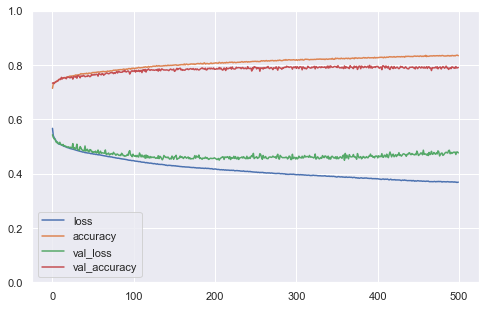

--------------
 tanh 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               2400      
                                                                 
 dense_5 (Dense)             (None, 150)               30150     
                                                                 
 dense_6 (Dense)             (None, 50)                7550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.5222 - accuracy: 0.7377 - val_loss: 0.5212 - val_accuracy: 0.7431
Epoch 2/50

962/962 [==============================] - 2s 2ms/step - loss: 0.3840 - accuracy: 0.8221 - val_loss: 0.4638 - val_accuracy: 0.7847
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3836 - accuracy: 0.8232 - val_loss: 0.4693 - val_accuracy: 0.7846
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3805 - accuracy: 0.8254 - val_loss: 0.4664 - val_accuracy: 0.7838
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3794 - accuracy: 0.8277 - val_loss: 0.4843 - val_accuracy: 0.7843
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3778 - accuracy: 0.8275 - val_loss: 0.4760 - val_accuracy: 0.7816
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3763 - accuracy: 0.8276 - val_loss: 0.4716 - val_accuracy: 0.7839
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3756 - accuracy: 0.8272 - val_loss: 0.4675 - val_accuracy: 0.7859
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3012 - accuracy: 0.8661 - val_loss: 0.5305 - val_accuracy: 0.7795
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2995 - accuracy: 0.8674 - val_loss: 0.5386 - val_accuracy: 0.7765
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2979 - accuracy: 0.8690 - val_loss: 0.5359 - val_accuracy: 0.7775
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2967 - accuracy: 0.8692 - val_loss: 0.5442 - val_accuracy: 0.7769
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.8689 - val_loss: 0.5391 - val_accuracy: 0.7791
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2954 - accuracy: 0.8689 - val_loss: 0.5459 - val_accuracy: 0.7708
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.8691 - val_loss: 0.5467 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.2453 - accuracy: 0.8945 - val_loss: 0.6263 - val_accuracy: 0.7669
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2432 - accuracy: 0.8955 - val_loss: 0.6309 - val_accuracy: 0.7716
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2429 - accuracy: 0.8964 - val_loss: 0.6300 - val_accuracy: 0.7721
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2436 - accuracy: 0.8956 - val_loss: 0.6275 - val_accuracy: 0.7688
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2426 - accuracy: 0.8955 - val_loss: 0.6234 - val_accuracy: 0.7730
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2410 - accuracy: 0.8962 - val_loss: 0.6245 - val_accuracy: 0.7700
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2395 - accuracy: 0.8982 - val_loss: 0.6455 - val_accuracy: 0.7683

962/962 [==============================] - 2s 2ms/step - loss: 0.2043 - accuracy: 0.9163 - val_loss: 0.7212 - val_accuracy: 0.7626
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2056 - accuracy: 0.9139 - val_loss: 0.7217 - val_accuracy: 0.7655
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2048 - accuracy: 0.9160 - val_loss: 0.7153 - val_accuracy: 0.7685
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2047 - accuracy: 0.9144 - val_loss: 0.7316 - val_accuracy: 0.7621
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2040 - accuracy: 0.9167 - val_loss: 0.7245 - val_accuracy: 0.7618
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2030 - accuracy: 0.9152 - val_loss: 0.7378 - val_accuracy: 0.7668
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.2051 - accuracy: 0.9175 - val_loss: 0.7156 - val_accuracy: 0.7672

962/962 [==============================] - 2s 2ms/step - loss: 0.1833 - accuracy: 0.9252 - val_loss: 0.7925 - val_accuracy: 0.7638
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1816 - accuracy: 0.9267 - val_loss: 0.7924 - val_accuracy: 0.7603
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1812 - accuracy: 0.9273 - val_loss: 0.7994 - val_accuracy: 0.7649
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1789 - accuracy: 0.9279 - val_loss: 0.7961 - val_accuracy: 0.7660
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1813 - accuracy: 0.9257 - val_loss: 0.7991 - val_accuracy: 0.7584
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1788 - accuracy: 0.9279 - val_loss: 0.7952 - val_accuracy: 0.7627
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1777 - accuracy: 0.9285 - val_loss: 0.8072 - val_accuracy: 0.7570

962/962 [==============================] - 2s 2ms/step - loss: 0.1643 - accuracy: 0.9341 - val_loss: 0.8615 - val_accuracy: 0.7586
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1634 - accuracy: 0.9328 - val_loss: 0.8695 - val_accuracy: 0.7516
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1651 - accuracy: 0.9338 - val_loss: 0.8643 - val_accuracy: 0.7627
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1619 - accuracy: 0.9352 - val_loss: 0.8405 - val_accuracy: 0.7635
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1620 - accuracy: 0.9341 - val_loss: 0.8550 - val_accuracy: 0.7556
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1628 - accuracy: 0.9340 - val_loss: 0.8657 - val_accuracy: 0.7685
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1621 - accuracy: 0.9343 - val_loss: 0.8532 - val_accuracy: 0.7644

962/962 [==============================] - 2s 2ms/step - loss: 0.1508 - accuracy: 0.9387 - val_loss: 0.9271 - val_accuracy: 0.7526
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1496 - accuracy: 0.9391 - val_loss: 0.9145 - val_accuracy: 0.7597
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1485 - accuracy: 0.9409 - val_loss: 0.9062 - val_accuracy: 0.7640
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1507 - accuracy: 0.9405 - val_loss: 0.9188 - val_accuracy: 0.7638
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1498 - accuracy: 0.9399 - val_loss: 0.9173 - val_accuracy: 0.7553
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1506 - accuracy: 0.9387 - val_loss: 0.9188 - val_accuracy: 0.7627
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1499 - accuracy: 0.9399 - val_loss: 0.9331 - val_accuracy: 0.7605

962/962 [==============================] - 2s 2ms/step - loss: 0.1397 - accuracy: 0.9443 - val_loss: 0.9712 - val_accuracy: 0.7542
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1396 - accuracy: 0.9448 - val_loss: 0.9569 - val_accuracy: 0.7544
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1398 - accuracy: 0.9455 - val_loss: 0.9659 - val_accuracy: 0.7595
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1403 - accuracy: 0.9444 - val_loss: 0.9649 - val_accuracy: 0.7500
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1403 - accuracy: 0.9438 - val_loss: 0.9621 - val_accuracy: 0.7548
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1406 - accuracy: 0.9449 - val_loss: 0.9695 - val_accuracy: 0.7568
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.1411 - accuracy: 0.9444 - val_loss: 0.9838 - val_accuracy: 0.7548

241/241 [==============================] - 0s 2ms/step - loss: 0.9951 - accuracy: 0.7604

--------------
 [0.9950832724571228, 0.7603949904441833]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7603950103950103
Recall: 0.7858439201451906
Precision: 0.7485798962706841
F1: 0.7667594232228686


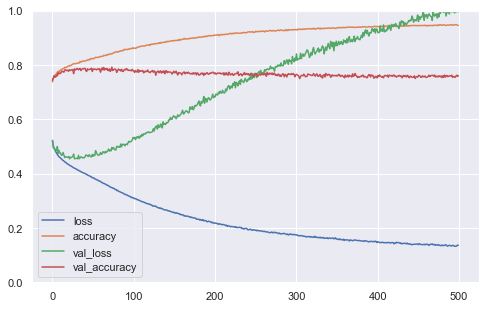

--------------
 relu 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               2400      
                                                                 
 dense_9 (Dense)             (None, 150)               30150     
                                                                 
 dense_10 (Dense)            (None, 50)                7550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.5218 - accuracy: 0.7440 - val_loss: 0.5116 - val_accuracy: 0.7487
Epoch 2/50

962/962 [==============================] - 2s 2ms/step - loss: 0.4267 - accuracy: 0.8072 - val_loss: 0.4957 - val_accuracy: 0.7877
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4244 - accuracy: 0.8088 - val_loss: 0.4981 - val_accuracy: 0.7840
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4254 - accuracy: 0.8078 - val_loss: 0.4878 - val_accuracy: 0.7891
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4252 - accuracy: 0.8095 - val_loss: 0.4989 - val_accuracy: 0.7883
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4251 - accuracy: 0.8087 - val_loss: 0.4926 - val_accuracy: 0.7929
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4261 - accuracy: 0.8084 - val_loss: 0.5072 - val_accuracy: 0.7915
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4243 - accuracy: 0.8087 - val_loss: 0.5086 - val_accuracy: 0.7920
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4257 - accuracy: 0.8178 - val_loss: 0.5717 - val_accuracy: 0.7899
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4179 - accuracy: 0.8162 - val_loss: 0.5525 - val_accuracy: 0.7927
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4268 - accuracy: 0.8176 - val_loss: 0.5282 - val_accuracy: 0.7942
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4226 - accuracy: 0.8180 - val_loss: 0.5636 - val_accuracy: 0.7960
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4188 - accuracy: 0.8148 - val_loss: 0.5970 - val_accuracy: 0.7917
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4230 - accuracy: 0.8170 - val_loss: 0.5579 - val_accuracy: 0.7925
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4176 - accuracy: 0.8173 - val_loss: 0.5158 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.4167 - accuracy: 0.8228 - val_loss: 0.7177 - val_accuracy: 0.7887
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4382 - accuracy: 0.8197 - val_loss: 0.7003 - val_accuracy: 0.7953
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4199 - accuracy: 0.8226 - val_loss: 0.6669 - val_accuracy: 0.7948
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4307 - accuracy: 0.8226 - val_loss: 0.6834 - val_accuracy: 0.7904
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4277 - accuracy: 0.8217 - val_loss: 0.7317 - val_accuracy: 0.7939
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4274 - accuracy: 0.8220 - val_loss: 0.7247 - val_accuracy: 0.7904
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4304 - accuracy: 0.8217 - val_loss: 0.7881 - val_accuracy: 0.7860

962/962 [==============================] - 2s 2ms/step - loss: 0.4359 - accuracy: 0.8237 - val_loss: 0.8544 - val_accuracy: 0.7933
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4019 - accuracy: 0.8275 - val_loss: 0.8135 - val_accuracy: 0.7900
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4338 - accuracy: 0.8257 - val_loss: 0.9094 - val_accuracy: 0.7866
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8254 - val_loss: 0.8787 - val_accuracy: 0.7915
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4262 - accuracy: 0.8271 - val_loss: 0.9170 - val_accuracy: 0.7957
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4479 - accuracy: 0.8265 - val_loss: 0.8550 - val_accuracy: 0.7924
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4470 - accuracy: 0.8260 - val_loss: 0.8072 - val_accuracy: 0.7911

962/962 [==============================] - 2s 2ms/step - loss: 0.4006 - accuracy: 0.8294 - val_loss: 1.2291 - val_accuracy: 0.7924
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4456 - accuracy: 0.8283 - val_loss: 1.1712 - val_accuracy: 0.7937
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4418 - accuracy: 0.8267 - val_loss: 1.3156 - val_accuracy: 0.7900
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4295 - accuracy: 0.8289 - val_loss: 1.3073 - val_accuracy: 0.7899
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4623 - accuracy: 0.8297 - val_loss: 0.9891 - val_accuracy: 0.7943
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4679 - accuracy: 0.8299 - val_loss: 1.4908 - val_accuracy: 0.7876
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4323 - accuracy: 0.8282 - val_loss: 0.9505 - val_accuracy: 0.7917

962/962 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.8312 - val_loss: 1.0150 - val_accuracy: 0.7902
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4709 - accuracy: 0.8308 - val_loss: 1.3609 - val_accuracy: 0.7840
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4765 - accuracy: 0.8332 - val_loss: 1.1752 - val_accuracy: 0.7879
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8312 - val_loss: 1.0109 - val_accuracy: 0.7856
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4122 - accuracy: 0.8324 - val_loss: 1.8005 - val_accuracy: 0.7933
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4153 - accuracy: 0.8339 - val_loss: 2.0649 - val_accuracy: 0.7931
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4538 - accuracy: 0.8330 - val_loss: 1.1563 - val_accuracy: 0.7876

962/962 [==============================] - 2s 2ms/step - loss: 0.4872 - accuracy: 0.8318 - val_loss: 1.1300 - val_accuracy: 0.7904
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4828 - accuracy: 0.8353 - val_loss: 1.3509 - val_accuracy: 0.7864
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5888 - accuracy: 0.8348 - val_loss: 1.9429 - val_accuracy: 0.7873
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4824 - accuracy: 0.8352 - val_loss: 1.1426 - val_accuracy: 0.7911
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5218 - accuracy: 0.8346 - val_loss: 1.1795 - val_accuracy: 0.7903
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.8326 - val_loss: 1.8065 - val_accuracy: 0.7877
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4912 - accuracy: 0.8326 - val_loss: 1.1236 - val_accuracy: 0.7943

962/962 [==============================] - 2s 2ms/step - loss: 0.6067 - accuracy: 0.8351 - val_loss: 1.1750 - val_accuracy: 0.7840
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4338 - accuracy: 0.8354 - val_loss: 2.3960 - val_accuracy: 0.7872
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5086 - accuracy: 0.8343 - val_loss: 1.0779 - val_accuracy: 0.7886
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5196 - accuracy: 0.8353 - val_loss: 1.1702 - val_accuracy: 0.7922
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4981 - accuracy: 0.8341 - val_loss: 2.1868 - val_accuracy: 0.7869
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5681 - accuracy: 0.8370 - val_loss: 2.3862 - val_accuracy: 0.7872
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4283 - accuracy: 0.8345 - val_loss: 1.4835 - val_accuracy: 0.7917

241/241 [==============================] - 0s 1ms/step - loss: 1.2183 - accuracy: 0.7760

--------------
 [1.218286156654358, 0.7759875059127808]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.775987525987526
Recall: 0.705989110707804
Precision: 0.8219136734077875
F1: 0.7595536959553696


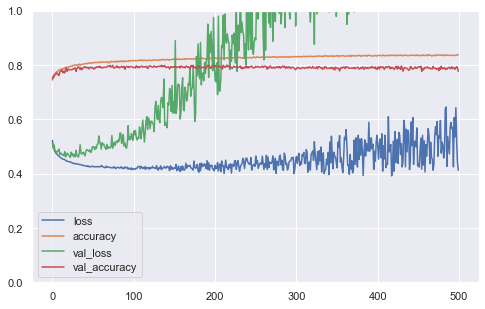

--------------
 elu 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               2400      
                                                                 
 dense_13 (Dense)            (None, 150)               30150     
                                                                 
 dense_14 (Dense)            (None, 50)                7550      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.5265 - accuracy: 0.7359 - val_loss: 0.5241 - val_accuracy: 0.7418
Epoch 2/500

962/962 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.7962 - val_loss: 0.4677 - val_accuracy: 0.7756
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4332 - accuracy: 0.7948 - val_loss: 0.4639 - val_accuracy: 0.7822
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4326 - accuracy: 0.7956 - val_loss: 0.4585 - val_accuracy: 0.7864
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4324 - accuracy: 0.7959 - val_loss: 0.4580 - val_accuracy: 0.7850
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4314 - accuracy: 0.7943 - val_loss: 0.4597 - val_accuracy: 0.7869
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4309 - accuracy: 0.7954 - val_loss: 0.4518 - val_accuracy: 0.7869
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4302 - accuracy: 0.7965 - val_loss: 0.4606 - val_accuracy: 0.7839
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4080 - accuracy: 0.8111 - val_loss: 0.4554 - val_accuracy: 0.7927
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4059 - accuracy: 0.8129 - val_loss: 0.4630 - val_accuracy: 0.7908
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4064 - accuracy: 0.8145 - val_loss: 0.4682 - val_accuracy: 0.7847
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4068 - accuracy: 0.8118 - val_loss: 0.4551 - val_accuracy: 0.7905
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.8127 - val_loss: 0.4549 - val_accuracy: 0.7886
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4044 - accuracy: 0.8116 - val_loss: 0.4614 - val_accuracy: 0.7889
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4040 - accuracy: 0.8127 - val_loss: 0.4590 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.3922 - accuracy: 0.8202 - val_loss: 0.4669 - val_accuracy: 0.7946
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3914 - accuracy: 0.8224 - val_loss: 0.4708 - val_accuracy: 0.7868
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3949 - accuracy: 0.8204 - val_loss: 0.4866 - val_accuracy: 0.7831
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3924 - accuracy: 0.8230 - val_loss: 0.4916 - val_accuracy: 0.7886
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3907 - accuracy: 0.8198 - val_loss: 0.4826 - val_accuracy: 0.7909
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3944 - accuracy: 0.8216 - val_loss: 0.4819 - val_accuracy: 0.7852
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3926 - accuracy: 0.8228 - val_loss: 0.4837 - val_accuracy: 0.7816

962/962 [==============================] - 2s 2ms/step - loss: 0.3852 - accuracy: 0.8270 - val_loss: 0.5035 - val_accuracy: 0.7905
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3884 - accuracy: 0.8277 - val_loss: 0.4894 - val_accuracy: 0.7905
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3838 - accuracy: 0.8268 - val_loss: 0.4811 - val_accuracy: 0.7950
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3856 - accuracy: 0.8274 - val_loss: 0.4927 - val_accuracy: 0.7827
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3846 - accuracy: 0.8280 - val_loss: 0.4938 - val_accuracy: 0.7959
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3822 - accuracy: 0.8297 - val_loss: 0.4962 - val_accuracy: 0.7842
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3847 - accuracy: 0.8276 - val_loss: 0.5027 - val_accuracy: 0.7795

962/962 [==============================] - 2s 2ms/step - loss: 0.3796 - accuracy: 0.8309 - val_loss: 0.5443 - val_accuracy: 0.7834
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3805 - accuracy: 0.8316 - val_loss: 0.5268 - val_accuracy: 0.7856
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3799 - accuracy: 0.8318 - val_loss: 0.5655 - val_accuracy: 0.7855
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3853 - accuracy: 0.8321 - val_loss: 0.5446 - val_accuracy: 0.7787
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3787 - accuracy: 0.8318 - val_loss: 0.5392 - val_accuracy: 0.7889
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3866 - accuracy: 0.8311 - val_loss: 0.5143 - val_accuracy: 0.7925
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3812 - accuracy: 0.8320 - val_loss: 0.5164 - val_accuracy: 0.7855

962/962 [==============================] - 2s 2ms/step - loss: 0.3766 - accuracy: 0.8346 - val_loss: 0.5874 - val_accuracy: 0.7808
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3801 - accuracy: 0.8343 - val_loss: 0.5511 - val_accuracy: 0.7782
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3854 - accuracy: 0.8351 - val_loss: 0.5509 - val_accuracy: 0.7811
Epoch 335/500
962/962 [==============================] - 2s 3ms/step - loss: 0.3775 - accuracy: 0.8334 - val_loss: 0.5650 - val_accuracy: 0.7807
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3836 - accuracy: 0.8341 - val_loss: 0.5763 - val_accuracy: 0.7834
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3788 - accuracy: 0.8346 - val_loss: 0.5656 - val_accuracy: 0.7855
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3825 - accuracy: 0.8337 - val_loss: 0.5963 - val_accuracy: 0.7833

962/962 [==============================] - 2s 2ms/step - loss: 0.3799 - accuracy: 0.8359 - val_loss: 0.5727 - val_accuracy: 0.7804
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3831 - accuracy: 0.8355 - val_loss: 0.5693 - val_accuracy: 0.7792
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3813 - accuracy: 0.8345 - val_loss: 0.5640 - val_accuracy: 0.7743
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3828 - accuracy: 0.8367 - val_loss: 0.5638 - val_accuracy: 0.7856
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3801 - accuracy: 0.8369 - val_loss: 0.5686 - val_accuracy: 0.7907
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3801 - accuracy: 0.8356 - val_loss: 0.5893 - val_accuracy: 0.7864
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3771 - accuracy: 0.8346 - val_loss: 0.5729 - val_accuracy: 0.7896

962/962 [==============================] - 2s 2ms/step - loss: 0.3833 - accuracy: 0.8359 - val_loss: 0.6074 - val_accuracy: 0.7894
Epoch 445/500
962/962 [==============================] - 2s 3ms/step - loss: 0.3792 - accuracy: 0.8361 - val_loss: 0.6502 - val_accuracy: 0.7785
Epoch 446/500
962/962 [==============================] - 3s 3ms/step - loss: 0.3832 - accuracy: 0.8349 - val_loss: 0.6171 - val_accuracy: 0.7825
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3823 - accuracy: 0.8355 - val_loss: 0.6132 - val_accuracy: 0.7887
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3849 - accuracy: 0.8366 - val_loss: 0.6203 - val_accuracy: 0.7813
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3766 - accuracy: 0.8356 - val_loss: 0.6406 - val_accuracy: 0.7809
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3882 - accuracy: 0.8379 - val_loss: 0.6158 - val_accuracy: 0.7863

241/241 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.7777

--------------
 [0.6576401591300964, 0.7776767015457153]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7776767151767152
Recall: 0.7523982369717397
Precision: 0.793329688354292
F1: 0.7723220226214239


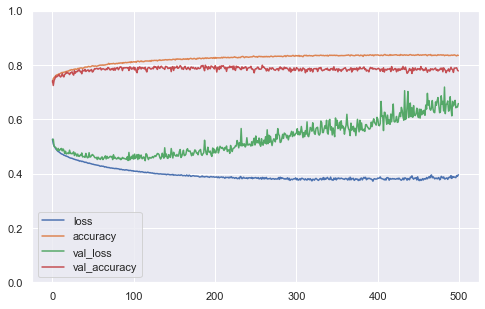

--------------
 LeakyReLU 


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               2400      
                                                                 
 dense_17 (Dense)            (None, 150)               30150     
                                                                 
 dense_18 (Dense)            (None, 50)                7550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 3ms/step - loss: 0.5236 - accuracy: 0.7442 - val_loss: 0.5141 - val_accuracy: 0.7465
Epoch

962/962 [==============================] - 2s 3ms/step - loss: 0.4414 - accuracy: 0.7898 - val_loss: 0.4615 - val_accuracy: 0.7821
Epoch 52/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4408 - accuracy: 0.7900 - val_loss: 0.4633 - val_accuracy: 0.7770
Epoch 53/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4416 - accuracy: 0.7922 - val_loss: 0.4728 - val_accuracy: 0.7681
Epoch 54/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4397 - accuracy: 0.7903 - val_loss: 0.4732 - val_accuracy: 0.7838
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4402 - accuracy: 0.7928 - val_loss: 0.4665 - val_accuracy: 0.7761
Epoch 56/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4397 - accuracy: 0.7920 - val_loss: 0.4681 - val_accuracy: 0.7792
Epoch 57/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4396 - accuracy: 0.7926 - val_loss: 0.4612 - val_accuracy: 0.7820
Epoch

Epoch 108/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4238 - accuracy: 0.8007 - val_loss: 0.4671 - val_accuracy: 0.7759
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4240 - accuracy: 0.8025 - val_loss: 0.4665 - val_accuracy: 0.7850
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4250 - accuracy: 0.7993 - val_loss: 0.4599 - val_accuracy: 0.7801
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4239 - accuracy: 0.8019 - val_loss: 0.4757 - val_accuracy: 0.7876
Epoch 112/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4225 - accuracy: 0.8021 - val_loss: 0.4723 - val_accuracy: 0.7739
Epoch 113/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4226 - accuracy: 0.8038 - val_loss: 0.4634 - val_accuracy: 0.7870
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.8005 - val_loss: 0.4689 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.4145 - accuracy: 0.8084 - val_loss: 0.4583 - val_accuracy: 0.7821
Epoch 165/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4130 - accuracy: 0.8076 - val_loss: 0.4694 - val_accuracy: 0.7900
Epoch 166/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4121 - accuracy: 0.8076 - val_loss: 0.4576 - val_accuracy: 0.7863
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4138 - accuracy: 0.8058 - val_loss: 0.4589 - val_accuracy: 0.7850
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4118 - accuracy: 0.8088 - val_loss: 0.4575 - val_accuracy: 0.7879
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8078 - val_loss: 0.4566 - val_accuracy: 0.7905
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8070 - val_loss: 0.4741 - val_accuracy: 0.7840

962/962 [==============================] - 2s 2ms/step - loss: 0.4055 - accuracy: 0.8135 - val_loss: 0.4510 - val_accuracy: 0.7929
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4036 - accuracy: 0.8119 - val_loss: 0.4744 - val_accuracy: 0.7655
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4040 - accuracy: 0.8143 - val_loss: 0.4656 - val_accuracy: 0.7876
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4060 - accuracy: 0.8127 - val_loss: 0.4587 - val_accuracy: 0.7837
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4032 - accuracy: 0.8142 - val_loss: 0.4702 - val_accuracy: 0.7866
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4031 - accuracy: 0.8115 - val_loss: 0.4625 - val_accuracy: 0.7837
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4047 - accuracy: 0.8129 - val_loss: 0.4562 - val_accuracy: 0.7877

962/962 [==============================] - 2s 2ms/step - loss: 0.3980 - accuracy: 0.8177 - val_loss: 0.4565 - val_accuracy: 0.7853
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3976 - accuracy: 0.8153 - val_loss: 0.4553 - val_accuracy: 0.7866
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3970 - accuracy: 0.8170 - val_loss: 0.4577 - val_accuracy: 0.7907
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3966 - accuracy: 0.8189 - val_loss: 0.4525 - val_accuracy: 0.7900
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3972 - accuracy: 0.8180 - val_loss: 0.4696 - val_accuracy: 0.7874
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3970 - accuracy: 0.8183 - val_loss: 0.4677 - val_accuracy: 0.7826
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3969 - accuracy: 0.8179 - val_loss: 0.4566 - val_accuracy: 0.7917

962/962 [==============================] - 2s 2ms/step - loss: 0.3897 - accuracy: 0.8207 - val_loss: 0.4738 - val_accuracy: 0.7843
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3903 - accuracy: 0.8217 - val_loss: 0.4817 - val_accuracy: 0.7794
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3914 - accuracy: 0.8209 - val_loss: 0.4757 - val_accuracy: 0.7855
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3900 - accuracy: 0.8211 - val_loss: 0.4896 - val_accuracy: 0.7840
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3914 - accuracy: 0.8211 - val_loss: 0.4905 - val_accuracy: 0.7788
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3907 - accuracy: 0.8222 - val_loss: 0.4768 - val_accuracy: 0.7848
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3904 - accuracy: 0.8214 - val_loss: 0.4726 - val_accuracy: 0.7803

962/962 [==============================] - 2s 2ms/step - loss: 0.3850 - accuracy: 0.8238 - val_loss: 0.4819 - val_accuracy: 0.7782
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3870 - accuracy: 0.8243 - val_loss: 0.4647 - val_accuracy: 0.7899
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3865 - accuracy: 0.8225 - val_loss: 0.4684 - val_accuracy: 0.7848
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3851 - accuracy: 0.8222 - val_loss: 0.4640 - val_accuracy: 0.7870
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3850 - accuracy: 0.8246 - val_loss: 0.4817 - val_accuracy: 0.7833
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3869 - accuracy: 0.8243 - val_loss: 0.4828 - val_accuracy: 0.7860
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3877 - accuracy: 0.8239 - val_loss: 0.4881 - val_accuracy: 0.7885

962/962 [==============================] - 2s 2ms/step - loss: 0.3806 - accuracy: 0.8283 - val_loss: 0.5072 - val_accuracy: 0.7682
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3817 - accuracy: 0.8271 - val_loss: 0.4942 - val_accuracy: 0.7850
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8280 - val_loss: 0.4827 - val_accuracy: 0.7864
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3804 - accuracy: 0.8274 - val_loss: 0.4702 - val_accuracy: 0.7891
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3812 - accuracy: 0.8266 - val_loss: 0.4772 - val_accuracy: 0.7868
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8267 - val_loss: 0.4956 - val_accuracy: 0.7866
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8272 - val_loss: 0.4731 - val_accuracy: 0.7885

241/241 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7803

--------------
 [0.4819355905056, 0.7802754640579224]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7802754677754677
Recall: 0.817993259009593
Precision: 0.7613416988416989
F1: 0.7886514185726785


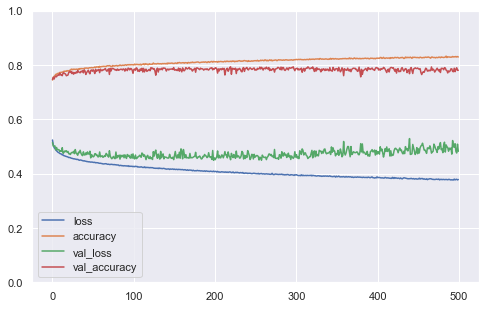

In [69]:
act_fun = ["sigmoid","tanh","relu", "elu","LeakyReLU"]
dfs = []

accuracy_score = []
recall_score = []
precision_score = []
f1_score = []

best_activation_function = "sigmoid"
best_activation_function_f1 = 0

for activ in act_fun:
    history = History()
    model = Sequential()
    model.add(Dense(200,activation=activ,input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(150,activation=activ))
    model.add(Dense(50,activation=activ))
    # sigmoid zawsze na ostatnim w przypadku binarnej klasyfikacji, zgodnie z rekomendacja
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss="binary_crossentropy", metrics=["accuracy"])

    print("--------------\n", activ,'\n\n')
    
    print(model.summary())

    history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32, epochs=500)

    print("\n--------------\n",model.evaluate(X_test_scaled,y_test))
    
    ypred = model.predict(X_test_scaled)
    pred_classes = np.where(ypred > 0.5, 1,0)
    
    print("Accuracy:", metrics.accuracy_score(y_true= y_test, y_pred= pred_classes))
    print("Recall:", metrics.recall_score(y_true= y_test, y_pred= pred_classes))
    print("Precision:", metrics.precision_score(y_true= y_test, y_pred= pred_classes))
    print("F1:", metrics.f1_score(y_true= y_test, y_pred= pred_classes))

    dfs.append(pd.DataFrame(history.history))
    
    accuracy_score.append(metrics.accuracy_score(y_true= y_test, y_pred= pred_classes ))
    recall_score.append(metrics.recall_score(y_true= y_test, y_pred= pred_classes))
    precision_score.append(metrics.precision_score(y_true= y_test, y_pred= pred_classes))
    f1_score.append(metrics.f1_score(y_true= y_test, y_pred= pred_classes))
    
    if metrics.f1_score(y_true= y_test, y_pred= pred_classes) > best_activation_function_f1:
        best_activation_function_f1 = metrics.f1_score(y_true= y_test, y_pred= pred_classes)
        best_activation_function = activ
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

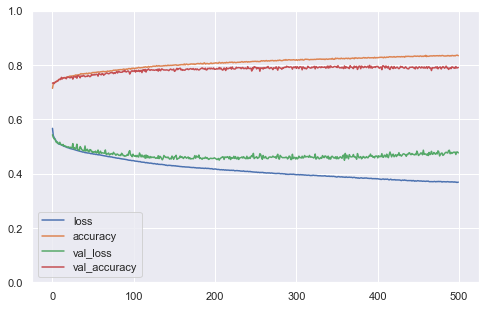

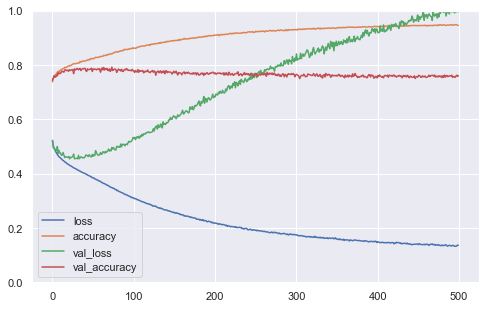

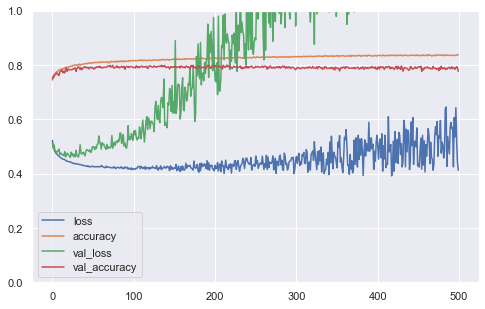

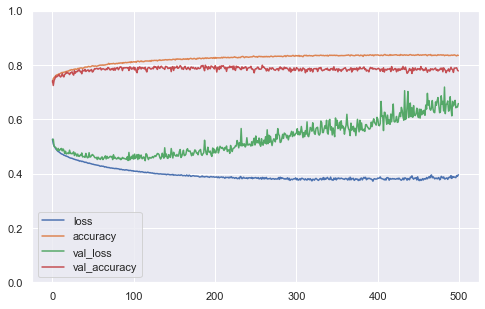

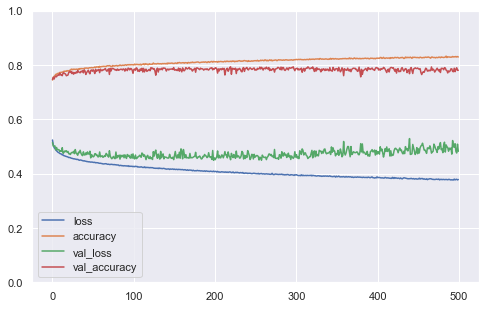

In [70]:
for df in dfs:
#     print(act_fun[dfs.index(df)])
    df.plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [71]:
import pandas as pd
d = {
    'accuracy_score' : accuracy_score, 
    'recall_score': recall_score, 
    'precision_score': precision_score, 
    'f1_score': f1_score
}

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Activation', value=["sigmoid","tanh","relu", "elu","LeakyReLU"])
df

,Activation,accuracy_score,recall_score,precision_score,f1_score
0,sigmoid,0.790411,0.850661,0.759843,0.802691
1,tanh,0.760395,0.785844,0.748580,0.766759
2,relu,0.775988,0.705989,0.821914,0.759554
3,elu,0.777677,0.752398,0.793330,0.772322
4,LeakyReLU,0.780275,0.817993,0.761342,0.788651


In [72]:
print(best_activation_function, best_activation_function_f1)

sigmoid 0.8026911314984709


In [73]:
# deydujemy optimizer

--------------
 SGD 


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 200)               2400      
                                                                 
 dense_21 (Dense)            (None, 150)               30150     
                                                                 
 dense_22 (Dense)            (None, 50)                7550      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.6882 - accuracy: 0.5631 - val_loss: 0.6862 - val_accuracy: 0.4988
Epoch 2/500

962/962 [==============================] - 2s 2ms/step - loss: 0.5327 - accuracy: 0.7347 - val_loss: 0.5333 - val_accuracy: 0.7287
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.7359 - val_loss: 0.5332 - val_accuracy: 0.7321
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5320 - accuracy: 0.7356 - val_loss: 0.5379 - val_accuracy: 0.7302
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7353 - val_loss: 0.5388 - val_accuracy: 0.7302
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5315 - accuracy: 0.7351 - val_loss: 0.5324 - val_accuracy: 0.7299
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5312 - accuracy: 0.7359 - val_loss: 0.5321 - val_accuracy: 0.7297
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5304 - accuracy: 0.7359 - val_loss: 0.5338 - val_accuracy: 0.7286
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5161 - accuracy: 0.7398 - val_loss: 0.5228 - val_accuracy: 0.7319
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5162 - accuracy: 0.7396 - val_loss: 0.5191 - val_accuracy: 0.7379
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5159 - accuracy: 0.7394 - val_loss: 0.5195 - val_accuracy: 0.7361
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5156 - accuracy: 0.7396 - val_loss: 0.5190 - val_accuracy: 0.7369
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5158 - accuracy: 0.7398 - val_loss: 0.5186 - val_accuracy: 0.7377
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5152 - accuracy: 0.7402 - val_loss: 0.5184 - val_accuracy: 0.7390
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5154 - accuracy: 0.7401 - val_loss: 0.5183 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.5086 - accuracy: 0.7467 - val_loss: 0.5119 - val_accuracy: 0.7421
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5086 - accuracy: 0.7463 - val_loss: 0.5142 - val_accuracy: 0.7477
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5086 - accuracy: 0.7457 - val_loss: 0.5116 - val_accuracy: 0.7443
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5086 - accuracy: 0.7469 - val_loss: 0.5111 - val_accuracy: 0.7435
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5084 - accuracy: 0.7468 - val_loss: 0.5163 - val_accuracy: 0.7391
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5079 - accuracy: 0.7487 - val_loss: 0.5114 - val_accuracy: 0.7468
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5082 - accuracy: 0.7487 - val_loss: 0.5110 - val_accuracy: 0.7429

962/962 [==============================] - 2s 2ms/step - loss: 0.5044 - accuracy: 0.7529 - val_loss: 0.5071 - val_accuracy: 0.7500
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5044 - accuracy: 0.7531 - val_loss: 0.5073 - val_accuracy: 0.7516
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5045 - accuracy: 0.7521 - val_loss: 0.5070 - val_accuracy: 0.7482
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5044 - accuracy: 0.7515 - val_loss: 0.5066 - val_accuracy: 0.7495
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5042 - accuracy: 0.7529 - val_loss: 0.5082 - val_accuracy: 0.7521
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5044 - accuracy: 0.7520 - val_loss: 0.5074 - val_accuracy: 0.7471
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5040 - accuracy: 0.7522 - val_loss: 0.5092 - val_accuracy: 0.7469

962/962 [==============================] - 2s 2ms/step - loss: 0.5016 - accuracy: 0.7555 - val_loss: 0.5050 - val_accuracy: 0.7501
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5018 - accuracy: 0.7547 - val_loss: 0.5071 - val_accuracy: 0.7483
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5018 - accuracy: 0.7558 - val_loss: 0.5043 - val_accuracy: 0.7513
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5017 - accuracy: 0.7554 - val_loss: 0.5042 - val_accuracy: 0.7512
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5020 - accuracy: 0.7547 - val_loss: 0.5072 - val_accuracy: 0.7523
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5019 - accuracy: 0.7550 - val_loss: 0.5056 - val_accuracy: 0.7517
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5014 - accuracy: 0.7556 - val_loss: 0.5042 - val_accuracy: 0.7521

962/962 [==============================] - 2s 2ms/step - loss: 0.4996 - accuracy: 0.7559 - val_loss: 0.5032 - val_accuracy: 0.7527
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5000 - accuracy: 0.7551 - val_loss: 0.5026 - val_accuracy: 0.7531
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4990 - accuracy: 0.7564 - val_loss: 0.5025 - val_accuracy: 0.7522
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5000 - accuracy: 0.7561 - val_loss: 0.5023 - val_accuracy: 0.7519
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4994 - accuracy: 0.7564 - val_loss: 0.5024 - val_accuracy: 0.7513
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4994 - accuracy: 0.7558 - val_loss: 0.5065 - val_accuracy: 0.7479
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4995 - accuracy: 0.7564 - val_loss: 0.5043 - val_accuracy: 0.7492

962/962 [==============================] - 2s 2ms/step - loss: 0.4977 - accuracy: 0.7573 - val_loss: 0.5003 - val_accuracy: 0.7568
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4979 - accuracy: 0.7574 - val_loss: 0.5001 - val_accuracy: 0.7566
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4976 - accuracy: 0.7572 - val_loss: 0.5003 - val_accuracy: 0.7544
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4979 - accuracy: 0.7565 - val_loss: 0.5013 - val_accuracy: 0.7517
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4976 - accuracy: 0.7569 - val_loss: 0.5011 - val_accuracy: 0.7557
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4980 - accuracy: 0.7576 - val_loss: 0.5016 - val_accuracy: 0.7558
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4973 - accuracy: 0.7577 - val_loss: 0.5051 - val_accuracy: 0.7538

962/962 [==============================] - 2s 2ms/step - loss: 0.4961 - accuracy: 0.7584 - val_loss: 0.4981 - val_accuracy: 0.7558
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4959 - accuracy: 0.7586 - val_loss: 0.4988 - val_accuracy: 0.7560
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4955 - accuracy: 0.7584 - val_loss: 0.5088 - val_accuracy: 0.7469
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4956 - accuracy: 0.7587 - val_loss: 0.4996 - val_accuracy: 0.7579
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4954 - accuracy: 0.7589 - val_loss: 0.4978 - val_accuracy: 0.7564
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4960 - accuracy: 0.7582 - val_loss: 0.5000 - val_accuracy: 0.7516
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4958 - accuracy: 0.7588 - val_loss: 0.4994 - val_accuracy: 0.7568

241/241 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7566

--------------
 [0.4963747560977936, 0.7566268444061279]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7566268191268192
Recall: 0.8138449572206378
Precision: 0.7310200279459711
F1: 0.7702122438964544


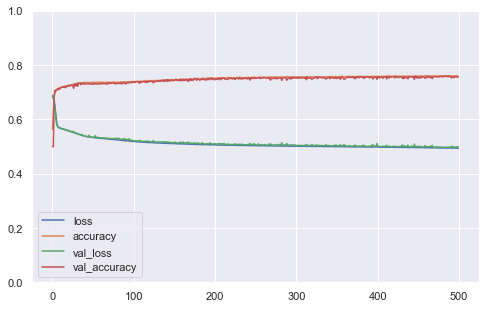

--------------
 RMSprop 


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               2400      
                                                                 
 dense_25 (Dense)            (None, 150)               30150     
                                                                 
 dense_26 (Dense)            (None, 50)                7550      
                                                                 
 dense_27 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.5670 - accuracy: 0.7117 - val_loss: 0.5428 - val_accuracy: 0.7357
Epoch 2

962/962 [==============================] - 2s 2ms/step - loss: 0.4677 - accuracy: 0.7741 - val_loss: 0.4818 - val_accuracy: 0.7633
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4679 - accuracy: 0.7735 - val_loss: 0.4793 - val_accuracy: 0.7620
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4674 - accuracy: 0.7753 - val_loss: 0.4838 - val_accuracy: 0.7616
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4669 - accuracy: 0.7731 - val_loss: 0.4776 - val_accuracy: 0.7665
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4666 - accuracy: 0.7756 - val_loss: 0.4804 - val_accuracy: 0.7623
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4663 - accuracy: 0.7768 - val_loss: 0.4764 - val_accuracy: 0.7660
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4648 - accuracy: 0.7769 - val_loss: 0.4847 - val_accuracy: 0.7670
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4427 - accuracy: 0.7910 - val_loss: 0.4704 - val_accuracy: 0.7779
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4420 - accuracy: 0.7919 - val_loss: 0.4637 - val_accuracy: 0.7837
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4414 - accuracy: 0.7916 - val_loss: 0.4580 - val_accuracy: 0.7837
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.7916 - val_loss: 0.4704 - val_accuracy: 0.7752
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4407 - accuracy: 0.7922 - val_loss: 0.4679 - val_accuracy: 0.7772
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.7941 - val_loss: 0.4577 - val_accuracy: 0.7827
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.7935 - val_loss: 0.4655 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.4226 - accuracy: 0.8024 - val_loss: 0.4592 - val_accuracy: 0.7848
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4209 - accuracy: 0.8051 - val_loss: 0.4633 - val_accuracy: 0.7822
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4222 - accuracy: 0.8035 - val_loss: 0.4576 - val_accuracy: 0.7891
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4213 - accuracy: 0.8033 - val_loss: 0.4598 - val_accuracy: 0.7899
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4211 - accuracy: 0.8029 - val_loss: 0.4644 - val_accuracy: 0.7837
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4214 - accuracy: 0.8033 - val_loss: 0.4553 - val_accuracy: 0.7913
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4196 - accuracy: 0.8041 - val_loss: 0.4542 - val_accuracy: 0.7909

962/962 [==============================] - 2s 2ms/step - loss: 0.4119 - accuracy: 0.8098 - val_loss: 0.4541 - val_accuracy: 0.7908
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4111 - accuracy: 0.8109 - val_loss: 0.4557 - val_accuracy: 0.7912
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4105 - accuracy: 0.8121 - val_loss: 0.4548 - val_accuracy: 0.7927
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4111 - accuracy: 0.8123 - val_loss: 0.4529 - val_accuracy: 0.7912
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4104 - accuracy: 0.8113 - val_loss: 0.4562 - val_accuracy: 0.7873
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4101 - accuracy: 0.8101 - val_loss: 0.4578 - val_accuracy: 0.7892
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4093 - accuracy: 0.8114 - val_loss: 0.4574 - val_accuracy: 0.7850

962/962 [==============================] - 2s 2ms/step - loss: 0.4001 - accuracy: 0.8172 - val_loss: 0.4595 - val_accuracy: 0.7935
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4001 - accuracy: 0.8179 - val_loss: 0.4597 - val_accuracy: 0.7921
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8164 - val_loss: 0.4563 - val_accuracy: 0.7961
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4008 - accuracy: 0.8161 - val_loss: 0.4540 - val_accuracy: 0.7956
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3998 - accuracy: 0.8165 - val_loss: 0.4564 - val_accuracy: 0.7950
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3996 - accuracy: 0.8168 - val_loss: 0.4636 - val_accuracy: 0.7953
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3994 - accuracy: 0.8153 - val_loss: 0.4603 - val_accuracy: 0.7947

962/962 [==============================] - 2s 2ms/step - loss: 0.3944 - accuracy: 0.8195 - val_loss: 0.4508 - val_accuracy: 0.7978
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3943 - accuracy: 0.8205 - val_loss: 0.4551 - val_accuracy: 0.7948
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3948 - accuracy: 0.8190 - val_loss: 0.4597 - val_accuracy: 0.7930
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.8210 - val_loss: 0.4622 - val_accuracy: 0.7963
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8212 - val_loss: 0.4563 - val_accuracy: 0.7973
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3939 - accuracy: 0.8197 - val_loss: 0.4688 - val_accuracy: 0.7908
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.8188 - val_loss: 0.4509 - val_accuracy: 0.8003

962/962 [==============================] - 2s 2ms/step - loss: 0.3882 - accuracy: 0.8232 - val_loss: 0.4614 - val_accuracy: 0.7944
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3893 - accuracy: 0.8214 - val_loss: 0.4604 - val_accuracy: 0.7979
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3885 - accuracy: 0.8243 - val_loss: 0.4590 - val_accuracy: 0.7921
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3885 - accuracy: 0.8235 - val_loss: 0.4720 - val_accuracy: 0.7895
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3894 - accuracy: 0.8242 - val_loss: 0.4716 - val_accuracy: 0.7961
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3872 - accuracy: 0.8243 - val_loss: 0.4609 - val_accuracy: 0.7937
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3879 - accuracy: 0.8244 - val_loss: 0.4643 - val_accuracy: 0.7934

962/962 [==============================] - 2s 2ms/step - loss: 0.3828 - accuracy: 0.8253 - val_loss: 0.4756 - val_accuracy: 0.7921
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3838 - accuracy: 0.8255 - val_loss: 0.4693 - val_accuracy: 0.7916
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3846 - accuracy: 0.8234 - val_loss: 0.4662 - val_accuracy: 0.7956
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3844 - accuracy: 0.8249 - val_loss: 0.4651 - val_accuracy: 0.7894
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3841 - accuracy: 0.8267 - val_loss: 0.4662 - val_accuracy: 0.7911
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3830 - accuracy: 0.8259 - val_loss: 0.4776 - val_accuracy: 0.7894
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3841 - accuracy: 0.8256 - val_loss: 0.4744 - val_accuracy: 0.7865

241/241 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7851

--------------
 [0.47519204020500183, 0.7850831747055054]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.78508316008316
Recall: 0.8361420793362717
Precision: 0.7593595479161761
F1: 0.7959032576505429


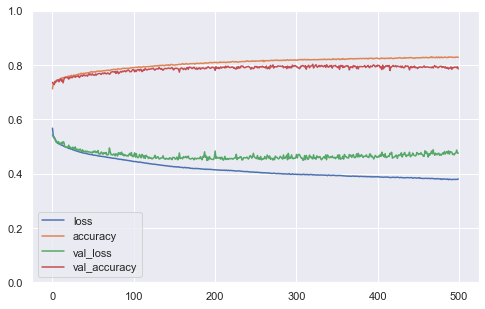

--------------
 Adagrad 


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 200)               2400      
                                                                 
 dense_29 (Dense)            (None, 150)               30150     
                                                                 
 dense_30 (Dense)            (None, 50)                7550      
                                                                 
 dense_31 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.7028 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 2

962/962 [==============================] - 2s 2ms/step - loss: 0.5673 - accuracy: 0.7152 - val_loss: 0.5681 - val_accuracy: 0.7139
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5670 - accuracy: 0.7157 - val_loss: 0.5679 - val_accuracy: 0.7148
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7160 - val_loss: 0.5676 - val_accuracy: 0.7147
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5665 - accuracy: 0.7163 - val_loss: 0.5673 - val_accuracy: 0.7139
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5662 - accuracy: 0.7164 - val_loss: 0.5671 - val_accuracy: 0.7144
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5660 - accuracy: 0.7169 - val_loss: 0.5669 - val_accuracy: 0.7141
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5658 - accuracy: 0.7167 - val_loss: 0.5667 - val_accuracy: 0.7140
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5593 - accuracy: 0.7228 - val_loss: 0.5606 - val_accuracy: 0.7188
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5592 - accuracy: 0.7229 - val_loss: 0.5605 - val_accuracy: 0.7191
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5591 - accuracy: 0.7235 - val_loss: 0.5604 - val_accuracy: 0.7186
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7231 - val_loss: 0.5603 - val_accuracy: 0.7195
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5589 - accuracy: 0.7233 - val_loss: 0.5601 - val_accuracy: 0.7195
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7238 - val_loss: 0.5600 - val_accuracy: 0.7197
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7236 - val_loss: 0.5599 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7278 - val_loss: 0.5550 - val_accuracy: 0.7228
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.7279 - val_loss: 0.5549 - val_accuracy: 0.7239
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7280 - val_loss: 0.5548 - val_accuracy: 0.7240
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7281 - val_loss: 0.5547 - val_accuracy: 0.7251
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7281 - val_loss: 0.5546 - val_accuracy: 0.7249
Epoch 169/500
962/962 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.7281 - val_loss: 0.5545 - val_accuracy: 0.7247
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5529 - accuracy: 0.7280 - val_loss: 0.5544 - val_accuracy: 0.7241

962/962 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7317 - val_loss: 0.5498 - val_accuracy: 0.7282
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7319 - val_loss: 0.5496 - val_accuracy: 0.7287
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7318 - val_loss: 0.5496 - val_accuracy: 0.7283
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7322 - val_loss: 0.5495 - val_accuracy: 0.7280
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7324 - val_loss: 0.5494 - val_accuracy: 0.7286
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7325 - val_loss: 0.5493 - val_accuracy: 0.7278
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7322 - val_loss: 0.5492 - val_accuracy: 0.7286

962/962 [==============================] - 2s 2ms/step - loss: 0.5435 - accuracy: 0.7345 - val_loss: 0.5451 - val_accuracy: 0.7330
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5434 - accuracy: 0.7345 - val_loss: 0.5450 - val_accuracy: 0.7331
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5434 - accuracy: 0.7347 - val_loss: 0.5450 - val_accuracy: 0.7327
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7345 - val_loss: 0.5449 - val_accuracy: 0.7328
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7346 - val_loss: 0.5448 - val_accuracy: 0.7326
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5431 - accuracy: 0.7347 - val_loss: 0.5447 - val_accuracy: 0.7327
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5431 - accuracy: 0.7343 - val_loss: 0.5447 - val_accuracy: 0.7331

962/962 [==============================] - 2s 2ms/step - loss: 0.5397 - accuracy: 0.7360 - val_loss: 0.5414 - val_accuracy: 0.7336
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5396 - accuracy: 0.7359 - val_loss: 0.5413 - val_accuracy: 0.7334
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7364 - val_loss: 0.5413 - val_accuracy: 0.7317
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7357 - val_loss: 0.5412 - val_accuracy: 0.7331
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7358 - val_loss: 0.5411 - val_accuracy: 0.7338
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7364 - val_loss: 0.5411 - val_accuracy: 0.7328
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5393 - accuracy: 0.7363 - val_loss: 0.5410 - val_accuracy: 0.7322

962/962 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7361 - val_loss: 0.5386 - val_accuracy: 0.7296
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7359 - val_loss: 0.5385 - val_accuracy: 0.7297
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7358 - val_loss: 0.5385 - val_accuracy: 0.7304
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7360 - val_loss: 0.5385 - val_accuracy: 0.7293
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7357 - val_loss: 0.5384 - val_accuracy: 0.7297
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7361 - val_loss: 0.5384 - val_accuracy: 0.7301
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7358 - val_loss: 0.5383 - val_accuracy: 0.7305

962/962 [==============================] - 2s 2ms/step - loss: 0.5347 - accuracy: 0.7360 - val_loss: 0.5366 - val_accuracy: 0.7312
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7362 - val_loss: 0.5366 - val_accuracy: 0.7295
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7361 - val_loss: 0.5366 - val_accuracy: 0.7295
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7360 - val_loss: 0.5365 - val_accuracy: 0.7309
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7363 - val_loss: 0.5365 - val_accuracy: 0.7308
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7361 - val_loss: 0.5365 - val_accuracy: 0.7306
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7361 - val_loss: 0.5365 - val_accuracy: 0.7312

241/241 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7297

--------------
 [0.5352780222892761, 0.7297297120094299]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7297297297297297
Recall: 0.8045112781954887
Precision: 0.7006096184240235
F1: 0.7489741733043689


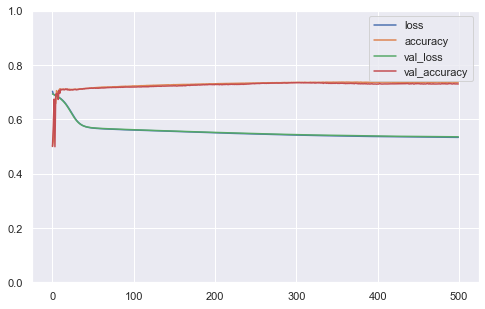

--------------
 Adadelta 


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 200)               2400      
                                                                 
 dense_33 (Dense)            (None, 150)               30150     
                                                                 
 dense_34 (Dense)            (None, 50)                7550      
                                                                 
 dense_35 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 2ms/step - loss: 0.7368 - accuracy: 0.5003 - val_loss: 0.7234 - val_accuracy: 0.4988
Epoch 

962/962 [==============================] - 2s 2ms/step - loss: 0.6721 - accuracy: 0.7023 - val_loss: 0.6718 - val_accuracy: 0.7004
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6715 - accuracy: 0.7016 - val_loss: 0.6712 - val_accuracy: 0.7006
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6709 - accuracy: 0.7008 - val_loss: 0.6706 - val_accuracy: 0.7017
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6702 - accuracy: 0.7019 - val_loss: 0.6699 - val_accuracy: 0.7008
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6696 - accuracy: 0.7019 - val_loss: 0.6693 - val_accuracy: 0.7002
Epoch 56/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6689 - accuracy: 0.7014 - val_loss: 0.6686 - val_accuracy: 0.7004
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6683 - accuracy: 0.7022 - val_loss: 0.6679 - val_accuracy: 0.7011
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6175 - accuracy: 0.7052 - val_loss: 0.6172 - val_accuracy: 0.7052
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6164 - accuracy: 0.7049 - val_loss: 0.6161 - val_accuracy: 0.7052
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6153 - accuracy: 0.7049 - val_loss: 0.6150 - val_accuracy: 0.7056
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6142 - accuracy: 0.7053 - val_loss: 0.6138 - val_accuracy: 0.7057
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6130 - accuracy: 0.7054 - val_loss: 0.6127 - val_accuracy: 0.7052
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6119 - accuracy: 0.7056 - val_loss: 0.6117 - val_accuracy: 0.7058
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.6108 - accuracy: 0.7055 - val_loss: 0.6106 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.5765 - accuracy: 0.7099 - val_loss: 0.5771 - val_accuracy: 0.7102
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5762 - accuracy: 0.7101 - val_loss: 0.5767 - val_accuracy: 0.7104
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5759 - accuracy: 0.7102 - val_loss: 0.5764 - val_accuracy: 0.7108
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5756 - accuracy: 0.7103 - val_loss: 0.5761 - val_accuracy: 0.7108
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5753 - accuracy: 0.7099 - val_loss: 0.5759 - val_accuracy: 0.7109
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5750 - accuracy: 0.7102 - val_loss: 0.5756 - val_accuracy: 0.7109
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5747 - accuracy: 0.7104 - val_loss: 0.5753 - val_accuracy: 0.7110

962/962 [==============================] - 2s 2ms/step - loss: 0.5676 - accuracy: 0.7149 - val_loss: 0.5686 - val_accuracy: 0.7132
Epoch 221/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5675 - accuracy: 0.7148 - val_loss: 0.5685 - val_accuracy: 0.7132
Epoch 222/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5674 - accuracy: 0.7151 - val_loss: 0.5684 - val_accuracy: 0.7136
Epoch 223/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5674 - accuracy: 0.7150 - val_loss: 0.5684 - val_accuracy: 0.7135
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5673 - accuracy: 0.7150 - val_loss: 0.5683 - val_accuracy: 0.7132
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5672 - accuracy: 0.7152 - val_loss: 0.5682 - val_accuracy: 0.7132
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5672 - accuracy: 0.7153 - val_loss: 0.5682 - val_accuracy: 0.7134

962/962 [==============================] - 2s 2ms/step - loss: 0.5648 - accuracy: 0.7182 - val_loss: 0.5659 - val_accuracy: 0.7156
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.7180 - val_loss: 0.5659 - val_accuracy: 0.7158
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.7182 - val_loss: 0.5659 - val_accuracy: 0.7157
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5646 - accuracy: 0.7183 - val_loss: 0.5658 - val_accuracy: 0.7157
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5646 - accuracy: 0.7185 - val_loss: 0.5658 - val_accuracy: 0.7157
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5646 - accuracy: 0.7184 - val_loss: 0.5658 - val_accuracy: 0.7156
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5645 - accuracy: 0.7181 - val_loss: 0.5657 - val_accuracy: 0.7157

962/962 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.7193 - val_loss: 0.5642 - val_accuracy: 0.7170
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.7193 - val_loss: 0.5641 - val_accuracy: 0.7171
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.7193 - val_loss: 0.5641 - val_accuracy: 0.7171
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.7195 - val_loss: 0.5641 - val_accuracy: 0.7173
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5627 - accuracy: 0.7196 - val_loss: 0.5640 - val_accuracy: 0.7171
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5627 - accuracy: 0.7195 - val_loss: 0.5640 - val_accuracy: 0.7174
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5627 - accuracy: 0.7197 - val_loss: 0.5640 - val_accuracy: 0.7171

962/962 [==============================] - 2s 2ms/step - loss: 0.5611 - accuracy: 0.7215 - val_loss: 0.5625 - val_accuracy: 0.7175
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5611 - accuracy: 0.7215 - val_loss: 0.5625 - val_accuracy: 0.7175
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5611 - accuracy: 0.7216 - val_loss: 0.5624 - val_accuracy: 0.7176
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7216 - val_loss: 0.5624 - val_accuracy: 0.7175
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7216 - val_loss: 0.5624 - val_accuracy: 0.7178
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7218 - val_loss: 0.5624 - val_accuracy: 0.7178
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5609 - accuracy: 0.7216 - val_loss: 0.5623 - val_accuracy: 0.7178

962/962 [==============================] - 2s 2ms/step - loss: 0.5594 - accuracy: 0.7228 - val_loss: 0.5609 - val_accuracy: 0.7192
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5594 - accuracy: 0.7227 - val_loss: 0.5609 - val_accuracy: 0.7193
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5594 - accuracy: 0.7226 - val_loss: 0.5608 - val_accuracy: 0.7193
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5593 - accuracy: 0.7226 - val_loss: 0.5608 - val_accuracy: 0.7192
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5593 - accuracy: 0.7224 - val_loss: 0.5608 - val_accuracy: 0.7192
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5593 - accuracy: 0.7227 - val_loss: 0.5607 - val_accuracy: 0.7191
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.5592 - accuracy: 0.7226 - val_loss: 0.5607 - val_accuracy: 0.7192

241/241 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7209

--------------
 [0.5592359900474548, 0.7208939790725708]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7208939708939709
Recall: 0.812807881773399
Precision: 0.6873492655119491
F1: 0.7448325017818959


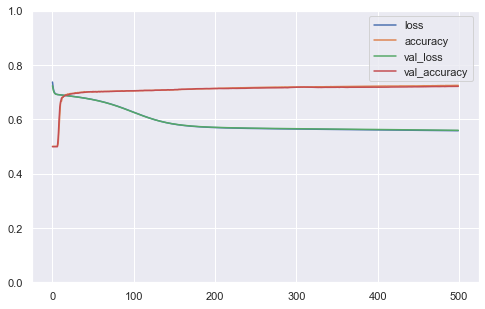

--------------
 Adam 


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 200)               2400      
                                                                 
 dense_37 (Dense)            (None, 150)               30150     
                                                                 
 dense_38 (Dense)            (None, 50)                7550      
                                                                 
 dense_39 (Dense)            (None, 1)                 51        
                                                                 
Total params: 40,151
Trainable params: 40,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
962/962 [==============================] - 3s 3ms/step - loss: 0.5633 - accuracy: 0.7154 - val_loss: 0.5379 - val_accuracy: 0.7364
Epoch 2/50

962/962 [==============================] - 2s 2ms/step - loss: 0.4636 - accuracy: 0.7764 - val_loss: 0.4737 - val_accuracy: 0.7687
Epoch 52/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4638 - accuracy: 0.7756 - val_loss: 0.4792 - val_accuracy: 0.7630
Epoch 53/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4622 - accuracy: 0.7770 - val_loss: 0.4724 - val_accuracy: 0.7672
Epoch 54/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4621 - accuracy: 0.7784 - val_loss: 0.4716 - val_accuracy: 0.7701
Epoch 55/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4611 - accuracy: 0.7775 - val_loss: 0.4757 - val_accuracy: 0.7659
Epoch 56/500
962/962 [==============================] - 3s 3ms/step - loss: 0.4607 - accuracy: 0.7762 - val_loss: 0.4725 - val_accuracy: 0.7679
Epoch 57/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4601 - accuracy: 0.7805 - val_loss: 0.4745 - val_accuracy: 0.7694
Epoch

Epoch 108/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4368 - accuracy: 0.7902 - val_loss: 0.4585 - val_accuracy: 0.7782
Epoch 109/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4368 - accuracy: 0.7906 - val_loss: 0.4556 - val_accuracy: 0.7848
Epoch 110/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4363 - accuracy: 0.7912 - val_loss: 0.4596 - val_accuracy: 0.7827
Epoch 111/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.7923 - val_loss: 0.4647 - val_accuracy: 0.7817
Epoch 112/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4358 - accuracy: 0.7937 - val_loss: 0.4577 - val_accuracy: 0.7787
Epoch 113/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.7914 - val_loss: 0.4564 - val_accuracy: 0.7853
Epoch 114/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.7929 - val_loss: 0.4572 - val_ac

962/962 [==============================] - 2s 2ms/step - loss: 0.4176 - accuracy: 0.8016 - val_loss: 0.4639 - val_accuracy: 0.7749
Epoch 165/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4179 - accuracy: 0.8016 - val_loss: 0.4587 - val_accuracy: 0.7821
Epoch 166/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4174 - accuracy: 0.8028 - val_loss: 0.4537 - val_accuracy: 0.7807
Epoch 167/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4164 - accuracy: 0.8023 - val_loss: 0.4543 - val_accuracy: 0.7829
Epoch 168/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4160 - accuracy: 0.8039 - val_loss: 0.4555 - val_accuracy: 0.7821
Epoch 169/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4149 - accuracy: 0.8037 - val_loss: 0.4549 - val_accuracy: 0.7899
Epoch 170/500
962/962 [==============================] - 2s 2ms/step - loss: 0.4156 - accuracy: 0.8037 - val_loss: 0.4519 - val_accuracy: 0.7847

962/962 [==============================] - 2s 2ms/step - loss: 0.3994 - accuracy: 0.8131 - val_loss: 0.4592 - val_accuracy: 0.7872
Epoch 221/500
962/962 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8122 - val_loss: 0.4549 - val_accuracy: 0.7829
Epoch 222/500
962/962 [==============================] - 3s 3ms/step - loss: 0.3991 - accuracy: 0.8113 - val_loss: 0.4597 - val_accuracy: 0.7822
Epoch 223/500
962/962 [==============================] - 2s 3ms/step - loss: 0.3988 - accuracy: 0.8122 - val_loss: 0.4585 - val_accuracy: 0.7804
Epoch 224/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3996 - accuracy: 0.8117 - val_loss: 0.4552 - val_accuracy: 0.7860
Epoch 225/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3983 - accuracy: 0.8116 - val_loss: 0.4545 - val_accuracy: 0.7866
Epoch 226/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3976 - accuracy: 0.8117 - val_loss: 0.4620 - val_accuracy: 0.7831

962/962 [==============================] - 2s 2ms/step - loss: 0.3821 - accuracy: 0.8201 - val_loss: 0.4664 - val_accuracy: 0.7847
Epoch 277/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3815 - accuracy: 0.8209 - val_loss: 0.4688 - val_accuracy: 0.7830
Epoch 278/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3810 - accuracy: 0.8206 - val_loss: 0.4677 - val_accuracy: 0.7835
Epoch 279/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3806 - accuracy: 0.8216 - val_loss: 0.4692 - val_accuracy: 0.7838
Epoch 280/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8195 - val_loss: 0.4709 - val_accuracy: 0.7825
Epoch 281/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3796 - accuracy: 0.8217 - val_loss: 0.4696 - val_accuracy: 0.7861
Epoch 282/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8206 - val_loss: 0.4694 - val_accuracy: 0.7813

962/962 [==============================] - 2s 2ms/step - loss: 0.3619 - accuracy: 0.8287 - val_loss: 0.4833 - val_accuracy: 0.7824
Epoch 333/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3631 - accuracy: 0.8300 - val_loss: 0.4843 - val_accuracy: 0.7774
Epoch 334/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3631 - accuracy: 0.8285 - val_loss: 0.4906 - val_accuracy: 0.7839
Epoch 335/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3613 - accuracy: 0.8302 - val_loss: 0.4878 - val_accuracy: 0.7840
Epoch 336/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3607 - accuracy: 0.8323 - val_loss: 0.4874 - val_accuracy: 0.7848
Epoch 337/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8307 - val_loss: 0.4873 - val_accuracy: 0.7885
Epoch 338/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3597 - accuracy: 0.8305 - val_loss: 0.4930 - val_accuracy: 0.7840

962/962 [==============================] - 2s 2ms/step - loss: 0.3431 - accuracy: 0.8375 - val_loss: 0.5200 - val_accuracy: 0.7813
Epoch 389/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3419 - accuracy: 0.8386 - val_loss: 0.5140 - val_accuracy: 0.7827
Epoch 390/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3418 - accuracy: 0.8401 - val_loss: 0.5089 - val_accuracy: 0.7852
Epoch 391/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3425 - accuracy: 0.8379 - val_loss: 0.5167 - val_accuracy: 0.7799
Epoch 392/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3413 - accuracy: 0.8404 - val_loss: 0.5109 - val_accuracy: 0.7847
Epoch 393/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3409 - accuracy: 0.8411 - val_loss: 0.5107 - val_accuracy: 0.7820
Epoch 394/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3408 - accuracy: 0.8400 - val_loss: 0.5171 - val_accuracy: 0.7833

962/962 [==============================] - 2s 2ms/step - loss: 0.3216 - accuracy: 0.8481 - val_loss: 0.5389 - val_accuracy: 0.7824
Epoch 445/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3213 - accuracy: 0.8508 - val_loss: 0.5472 - val_accuracy: 0.7833
Epoch 446/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3206 - accuracy: 0.8490 - val_loss: 0.5551 - val_accuracy: 0.7850
Epoch 447/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3212 - accuracy: 0.8499 - val_loss: 0.5657 - val_accuracy: 0.7821
Epoch 448/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.8489 - val_loss: 0.5483 - val_accuracy: 0.7827
Epoch 449/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3197 - accuracy: 0.8502 - val_loss: 0.5625 - val_accuracy: 0.7843
Epoch 450/500
962/962 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.8505 - val_loss: 0.5648 - val_accuracy: 0.7837

241/241 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7864

--------------
 [0.588219165802002, 0.7863825559616089]
241/241 [==============================] - 0s 1ms/step
Accuracy: 0.7863825363825364
Recall: 0.8117708063261603
Precision: 0.7732773524326995
F1: 0.7920566658234253


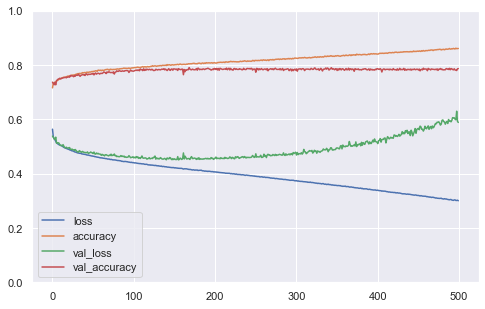

In [74]:
act_fun = ["SGD","RMSprop","Adagrad","Adadelta","Adam"]
dfs = []

accuracy_score = []
recall_score = []
precision_score = []
f1_score = []

best_optimizer = "SGD"
best_optimizer_f1 = 0

for activ in act_fun:
    history = History()
    model = Sequential()
    model.add(Dense(200,activation=best_activation_function,input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(150,activation=best_activation_function))
    model.add(Dense(50,activation=best_activation_function))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer=activ, metrics=["accuracy"])

    print("--------------\n", activ,'\n\n')
    
    print(model.summary())

    history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=500);

    print("\n--------------\n",model.evaluate(X_test_scaled,y_test))
    
    ypred = model.predict(X_test_scaled)
    pred_classes = np.where(ypred > 0.5, 1,0)
    
    print("Accuracy:", metrics.accuracy_score(y_true= y_test, y_pred= pred_classes))
    print("Recall:", metrics.recall_score(y_true= y_test, y_pred= pred_classes))
    print("Precision:", metrics.precision_score(y_true= y_test, y_pred= pred_classes))
    print("F1:", metrics.f1_score(y_true= y_test, y_pred= pred_classes))

    dfs.append(pd.DataFrame(history.history))
    
    accuracy_score.append(metrics.accuracy_score(y_true= y_test, y_pred= pred_classes ))
    recall_score.append(metrics.recall_score(y_true= y_test, y_pred= pred_classes))
    precision_score.append(metrics.precision_score(y_true= y_test, y_pred= pred_classes))
    f1_score.append(metrics.f1_score(y_true= y_test, y_pred= pred_classes))
    
    if metrics.f1_score(y_true= y_test, y_pred= pred_classes) > best_optimizer_f1:
        best_optimizer_f1 = metrics.f1_score(y_true= y_test, y_pred= pred_classes)
        best_optimizer = activ
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

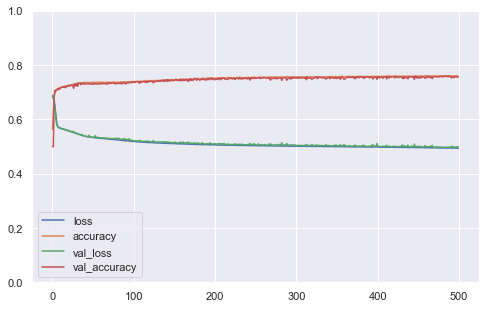

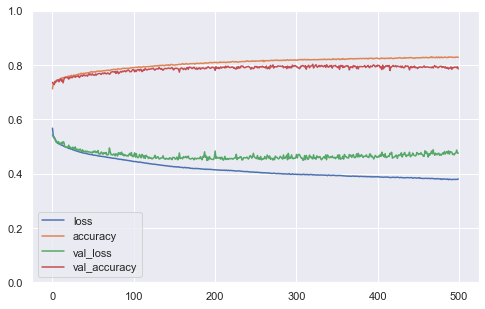

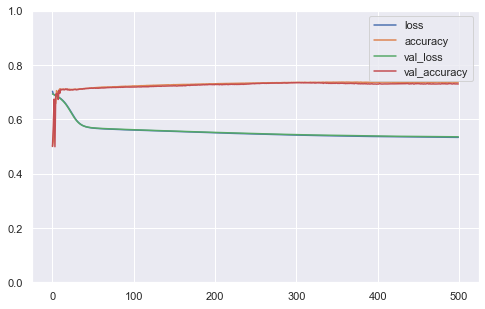

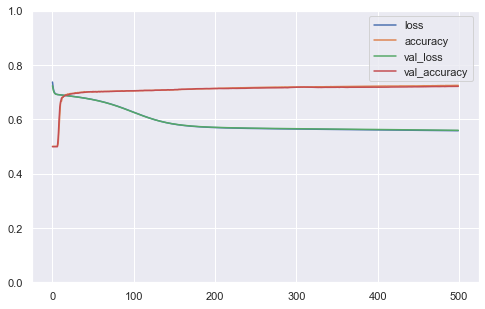

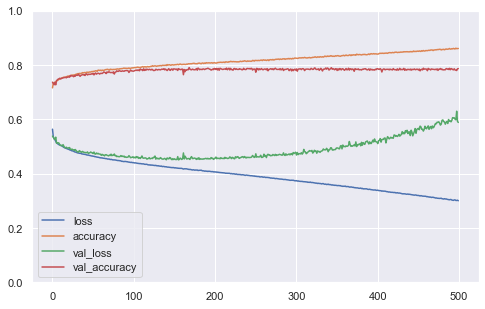

In [75]:
for df in dfs:
#     print(act_fun[dfs.index(df)])
    df.plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [76]:
import pandas as pd
d = {
    'accuracy_score' : accuracy_score, 
    'recall_score': recall_score, 
    'precision_score': precision_score, 
    'f1_score': f1_score
}

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Optimizer', value=["SGD","RMSprop","Adagrad","Adadelta","Adam"])
df

,Optimizer,accuracy_score,recall_score,precision_score,f1_score
0,SGD,0.756627,0.813845,0.731020,0.770212
1,RMSprop,0.785083,0.836142,0.759360,0.795903
2,Adagrad,0.729730,0.804511,0.700610,0.748974
3,Adadelta,0.720894,0.812808,0.687349,0.744833
4,Adam,0.786383,0.811771,0.773277,0.792057


In [77]:
print(best_optimizer, best_optimizer_f1)

RMSprop 0.7959032576505429


In [78]:
# laczymy w calosc

In [79]:
# podstawowy model

In [80]:
history1 = History()
model1 = Sequential()
model1.add(Dense(200, activation=best_activation_function, input_shape=(X_train_scaled.shape[1],)))
model1.add(Dense(150, activation=best_activation_function))
model1.add(Dense(50, activation=best_activation_function))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer=best_optimizer, metrics=["accuracy"])
history1 = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, epochs=1000, callbacks=[])

ypred1 = model1.predict(X_test_scaled)
model1_pred_classes = np.where(ypred1 > 0.5, 1,0)

print(model1.evaluate(X_test_scaled, y_test))
print("R2:",metrics.r2_score(y_true= y_test, y_pred= ypred1 ))

print(classification_report(y_test, model1_pred_classes))

Epoch 1/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5643 - accuracy: 0.7139 - val_loss: 0.5508 - val_accuracy: 0.7186
Epoch 2/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5390 - accuracy: 0.7312 - val_loss: 0.5401 - val_accuracy: 0.7315
Epoch 3/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.7331 - val_loss: 0.5262 - val_accuracy: 0.7347
Epoch 4/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.5261 - accuracy: 0.7355 - val_loss: 0.5227 - val_accuracy: 0.7323
Epoch 5/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.5195 - accuracy: 0.7374 - val_loss: 0.5167 - val_accuracy: 0.7430
Epoch 6/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.5151 - accuracy: 0.7409 - val_loss: 0.5215 - val_accuracy: 0.7347
Epoch 7/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.5122 - accuracy: 0.7437 - val_loss: 0.5168 - val_accuracy:

962/962 [==============================] - 2s 3ms/step - loss: 0.4653 - accuracy: 0.7776 - val_loss: 0.4753 - val_accuracy: 0.7626
Epoch 58/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4656 - accuracy: 0.7765 - val_loss: 0.4738 - val_accuracy: 0.7670
Epoch 59/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4646 - accuracy: 0.7766 - val_loss: 0.4731 - val_accuracy: 0.7683
Epoch 60/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4639 - accuracy: 0.7785 - val_loss: 0.4833 - val_accuracy: 0.7629
Epoch 61/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4627 - accuracy: 0.7780 - val_loss: 0.4738 - val_accuracy: 0.7677
Epoch 62/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4639 - accuracy: 0.7776 - val_loss: 0.4712 - val_accuracy: 0.7696
Epoch 63/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4622 - accuracy: 0.7785 - val_loss: 0.4696 - val_accuracy: 0.7688

962/962 [==============================] - 2s 3ms/step - loss: 0.4433 - accuracy: 0.7901 - val_loss: 0.4623 - val_accuracy: 0.7788
Epoch 114/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4420 - accuracy: 0.7921 - val_loss: 0.4673 - val_accuracy: 0.7804
Epoch 115/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4419 - accuracy: 0.7911 - val_loss: 0.4589 - val_accuracy: 0.7839
Epoch 116/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4418 - accuracy: 0.7916 - val_loss: 0.4631 - val_accuracy: 0.7787
Epoch 117/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4413 - accuracy: 0.7920 - val_loss: 0.4735 - val_accuracy: 0.7800
Epoch 118/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4410 - accuracy: 0.7934 - val_loss: 0.4682 - val_accuracy: 0.7779
Epoch 119/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4409 - accuracy: 0.7926 - val_loss: 0.4645 - val_accuracy: 

962/962 [==============================] - 2s 3ms/step - loss: 0.4271 - accuracy: 0.7985 - val_loss: 0.4545 - val_accuracy: 0.7865
Epoch 170/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.7998 - val_loss: 0.4690 - val_accuracy: 0.7809
Epoch 171/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4262 - accuracy: 0.7996 - val_loss: 0.4531 - val_accuracy: 0.7866
Epoch 172/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4248 - accuracy: 0.8005 - val_loss: 0.4521 - val_accuracy: 0.7833
Epoch 173/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4262 - accuracy: 0.8000 - val_loss: 0.4527 - val_accuracy: 0.7837
Epoch 174/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4246 - accuracy: 0.8016 - val_loss: 0.4536 - val_accuracy: 0.7843
Epoch 175/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.7987 - val_loss: 0.4555 - val_accuracy: 

962/962 [==============================] - 2s 3ms/step - loss: 0.4163 - accuracy: 0.8069 - val_loss: 0.4565 - val_accuracy: 0.7856
Epoch 226/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4145 - accuracy: 0.8068 - val_loss: 0.4537 - val_accuracy: 0.7860
Epoch 227/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4152 - accuracy: 0.8062 - val_loss: 0.4562 - val_accuracy: 0.7863
Epoch 228/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4162 - accuracy: 0.8054 - val_loss: 0.4543 - val_accuracy: 0.7863
Epoch 229/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4140 - accuracy: 0.8040 - val_loss: 0.4503 - val_accuracy: 0.7866
Epoch 230/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.4150 - accuracy: 0.8058 - val_loss: 0.4614 - val_accuracy: 0.7838
Epoch 231/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4143 - accuracy: 0.8066 - val_loss: 0.4526 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.4083 - accuracy: 0.8121 - val_loss: 0.4685 - val_accuracy: 0.7870
Epoch 282/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4074 - accuracy: 0.8108 - val_loss: 0.4494 - val_accuracy: 0.7927
Epoch 283/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4063 - accuracy: 0.8118 - val_loss: 0.4548 - val_accuracy: 0.7846
Epoch 284/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4065 - accuracy: 0.8129 - val_loss: 0.4579 - val_accuracy: 0.7899
Epoch 285/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4072 - accuracy: 0.8142 - val_loss: 0.4685 - val_accuracy: 0.7842
Epoch 286/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4068 - accuracy: 0.8111 - val_loss: 0.4633 - val_accuracy: 0.7834
Epoch 287/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4071 - accuracy: 0.8119 - val_loss: 0.4542 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.4012 - accuracy: 0.8157 - val_loss: 0.4670 - val_accuracy: 0.7912
Epoch 338/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4015 - accuracy: 0.8158 - val_loss: 0.4514 - val_accuracy: 0.7937
Epoch 339/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.4006 - accuracy: 0.8162 - val_loss: 0.4623 - val_accuracy: 0.7937
Epoch 340/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8156 - val_loss: 0.4606 - val_accuracy: 0.7920
Epoch 341/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3996 - accuracy: 0.8165 - val_loss: 0.4632 - val_accuracy: 0.7944
Epoch 342/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3995 - accuracy: 0.8153 - val_loss: 0.4578 - val_accuracy: 0.7925
Epoch 343/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8167 - val_loss: 0.4646 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3938 - accuracy: 0.8197 - val_loss: 0.4608 - val_accuracy: 0.7905
Epoch 394/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3941 - accuracy: 0.8206 - val_loss: 0.4648 - val_accuracy: 0.7882
Epoch 395/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3932 - accuracy: 0.8212 - val_loss: 0.4652 - val_accuracy: 0.7916
Epoch 396/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3923 - accuracy: 0.8194 - val_loss: 0.4665 - val_accuracy: 0.7947
Epoch 397/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3923 - accuracy: 0.8203 - val_loss: 0.4661 - val_accuracy: 0.7911
Epoch 398/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3917 - accuracy: 0.8202 - val_loss: 0.4664 - val_accuracy: 0.7835
Epoch 399/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3922 - accuracy: 0.8200 - val_loss: 0.4708 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3862 - accuracy: 0.8242 - val_loss: 0.4733 - val_accuracy: 0.7874
Epoch 450/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3865 - accuracy: 0.8238 - val_loss: 0.4671 - val_accuracy: 0.7916
Epoch 451/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3858 - accuracy: 0.8250 - val_loss: 0.4770 - val_accuracy: 0.7904
Epoch 452/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3858 - accuracy: 0.8225 - val_loss: 0.4708 - val_accuracy: 0.7876
Epoch 453/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3868 - accuracy: 0.8241 - val_loss: 0.4683 - val_accuracy: 0.7876
Epoch 454/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3858 - accuracy: 0.8232 - val_loss: 0.4695 - val_accuracy: 0.7876
Epoch 455/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3864 - accuracy: 0.8239 - val_loss: 0.4667 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3776 - accuracy: 0.8299 - val_loss: 0.4707 - val_accuracy: 0.7891
Epoch 506/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3781 - accuracy: 0.8280 - val_loss: 0.4720 - val_accuracy: 0.7933
Epoch 507/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3787 - accuracy: 0.8305 - val_loss: 0.4715 - val_accuracy: 0.7937
Epoch 508/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3775 - accuracy: 0.8287 - val_loss: 0.4796 - val_accuracy: 0.7892
Epoch 509/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3792 - accuracy: 0.8293 - val_loss: 0.4960 - val_accuracy: 0.7794
Epoch 510/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3787 - accuracy: 0.8300 - val_loss: 0.4764 - val_accuracy: 0.7908
Epoch 511/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3783 - accuracy: 0.8281 - val_loss: 0.4714 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3716 - accuracy: 0.8323 - val_loss: 0.4794 - val_accuracy: 0.7851
Epoch 562/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3720 - accuracy: 0.8323 - val_loss: 0.4779 - val_accuracy: 0.7898
Epoch 563/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3740 - accuracy: 0.8288 - val_loss: 0.4782 - val_accuracy: 0.7881
Epoch 564/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3715 - accuracy: 0.8313 - val_loss: 0.4763 - val_accuracy: 0.7879
Epoch 565/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3726 - accuracy: 0.8315 - val_loss: 0.4839 - val_accuracy: 0.7892
Epoch 566/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3721 - accuracy: 0.8334 - val_loss: 0.4758 - val_accuracy: 0.7899
Epoch 567/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3711 - accuracy: 0.8310 - val_loss: 0.4777 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3661 - accuracy: 0.8363 - val_loss: 0.4857 - val_accuracy: 0.7872
Epoch 618/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3655 - accuracy: 0.8337 - val_loss: 0.4860 - val_accuracy: 0.7839
Epoch 619/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8342 - val_loss: 0.4789 - val_accuracy: 0.7876
Epoch 620/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3666 - accuracy: 0.8346 - val_loss: 0.4912 - val_accuracy: 0.7861
Epoch 621/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3647 - accuracy: 0.8352 - val_loss: 0.4895 - val_accuracy: 0.7864
Epoch 622/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3641 - accuracy: 0.8373 - val_loss: 0.4858 - val_accuracy: 0.7902
Epoch 623/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3649 - accuracy: 0.8361 - val_loss: 0.4887 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3592 - accuracy: 0.8384 - val_loss: 0.5018 - val_accuracy: 0.7870
Epoch 674/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3593 - accuracy: 0.8398 - val_loss: 0.5020 - val_accuracy: 0.7883
Epoch 675/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3599 - accuracy: 0.8379 - val_loss: 0.4953 - val_accuracy: 0.7890
Epoch 676/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3595 - accuracy: 0.8377 - val_loss: 0.4922 - val_accuracy: 0.7891
Epoch 677/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3599 - accuracy: 0.8381 - val_loss: 0.4912 - val_accuracy: 0.7896
Epoch 678/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3590 - accuracy: 0.8390 - val_loss: 0.5028 - val_accuracy: 0.7843
Epoch 679/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3592 - accuracy: 0.8398 - val_loss: 0.4989 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3545 - accuracy: 0.8417 - val_loss: 0.5067 - val_accuracy: 0.7872
Epoch 730/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3553 - accuracy: 0.8403 - val_loss: 0.5000 - val_accuracy: 0.7903
Epoch 731/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3556 - accuracy: 0.8425 - val_loss: 0.5131 - val_accuracy: 0.7852
Epoch 732/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3542 - accuracy: 0.8422 - val_loss: 0.5061 - val_accuracy: 0.7879
Epoch 733/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3556 - accuracy: 0.8424 - val_loss: 0.5106 - val_accuracy: 0.7813
Epoch 734/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3555 - accuracy: 0.8423 - val_loss: 0.5049 - val_accuracy: 0.7879
Epoch 735/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3544 - accuracy: 0.8407 - val_loss: 0.5074 - val_accuracy: 

962/962 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.8438 - val_loss: 0.5106 - val_accuracy: 0.7935
Epoch 786/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8426 - val_loss: 0.5145 - val_accuracy: 0.7889
Epoch 787/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3515 - accuracy: 0.8434 - val_loss: 0.5171 - val_accuracy: 0.7840
Epoch 788/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3506 - accuracy: 0.8454 - val_loss: 0.5203 - val_accuracy: 0.7852
Epoch 789/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3506 - accuracy: 0.8446 - val_loss: 0.5234 - val_accuracy: 0.7860
Epoch 790/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3505 - accuracy: 0.8421 - val_loss: 0.5255 - val_accuracy: 0.7851
Epoch 791/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3503 - accuracy: 0.8444 - val_loss: 0.5277 - val_accuracy: 

962/962 [==============================] - 2s 3ms/step - loss: 0.3462 - accuracy: 0.8464 - val_loss: 0.5263 - val_accuracy: 0.7883
Epoch 842/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3459 - accuracy: 0.8468 - val_loss: 0.5291 - val_accuracy: 0.7864
Epoch 843/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3458 - accuracy: 0.8478 - val_loss: 0.5229 - val_accuracy: 0.7895
Epoch 844/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3451 - accuracy: 0.8465 - val_loss: 0.5324 - val_accuracy: 0.7824
Epoch 845/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3445 - accuracy: 0.8481 - val_loss: 0.5373 - val_accuracy: 0.7827
Epoch 846/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3453 - accuracy: 0.8467 - val_loss: 0.5245 - val_accuracy: 0.7886
Epoch 847/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3432 - accuracy: 0.8458 - val_loss: 0.5294 - val_accuracy: 

962/962 [==============================] - 2s 3ms/step - loss: 0.3433 - accuracy: 0.8494 - val_loss: 0.5285 - val_accuracy: 0.7820
Epoch 898/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3426 - accuracy: 0.8507 - val_loss: 0.5227 - val_accuracy: 0.7847
Epoch 899/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3433 - accuracy: 0.8485 - val_loss: 0.5194 - val_accuracy: 0.7817
Epoch 900/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3429 - accuracy: 0.8504 - val_loss: 0.5250 - val_accuracy: 0.7824
Epoch 901/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3411 - accuracy: 0.8490 - val_loss: 0.5262 - val_accuracy: 0.7835
Epoch 902/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3428 - accuracy: 0.8515 - val_loss: 0.5324 - val_accuracy: 0.7860
Epoch 903/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3428 - accuracy: 0.8483 - val_loss: 0.5275 - val_accuracy: 

962/962 [==============================] - 2s 2ms/step - loss: 0.3399 - accuracy: 0.8534 - val_loss: 0.5276 - val_accuracy: 0.7853
Epoch 954/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3395 - accuracy: 0.8528 - val_loss: 0.5306 - val_accuracy: 0.7842
Epoch 955/1000
962/962 [==============================] - 2s 2ms/step - loss: 0.3377 - accuracy: 0.8534 - val_loss: 0.5263 - val_accuracy: 0.7856
Epoch 956/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3384 - accuracy: 0.8521 - val_loss: 0.5340 - val_accuracy: 0.7798
Epoch 957/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3375 - accuracy: 0.8522 - val_loss: 0.5314 - val_accuracy: 0.7865
Epoch 958/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3383 - accuracy: 0.8518 - val_loss: 0.5182 - val_accuracy: 0.7855
Epoch 959/1000
962/962 [==============================] - 2s 3ms/step - loss: 0.3370 - accuracy: 0.8528 - val_loss: 0.5232 - val_accuracy: 

In [81]:
print("Validation:", model1.evaluate(X_val, y_val))
print("Validation R2:", metrics.r2_score(y_true= y_val, y_pred= model1.predict(X_val) ))

134/134 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.5493
Validation: [1.0423386096954346, 0.5493451952934265]
134/134 [==============================] - 0s 1ms/step
Validation R2: -0.26782651456214546


In [82]:
# model + learningratescheduler + early stopping + history

In [83]:
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import Activation

# scheduler
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history2 = History()
model2 = Sequential()
model2.add(Dense(200, use_bias=False,input_shape=(X_train_scaled.shape[1],)))
model2.add(BatchNormalization())
model2.add(Activation(best_activation_function))
model2.add(Dense(150, use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation(best_activation_function))
model2.add(Dense(50, use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation(best_activation_function))
model2.add(Dense(1,activation="sigmoid"))

model2.compile(loss="binary_crossentropy",optimizer=best_optimizer, metrics=["accuracy"])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min', verbose=1)

# LearningRateScheduler
lrate = LearningRateScheduler(step_decay)

history2 = model2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, epochs=1000, callbacks=[lrate, early_stopping, history])

ypred2 = model2.predict(X_test_scaled)
model2_pred_classes = np.where(ypred2 > 0.5, 1,0)

print(model2.evaluate(X_test_scaled, y_test))
print("R2:",metrics.r2_score(y_true= y_test, y_pred= ypred2 ))

print(classification_report(y_test, model2_pred_classes))

Epoch 1/1000
962/962 [==============================] - 4s 3ms/step - loss: 0.5556 - accuracy: 0.7240 - val_loss: 0.6068 - val_accuracy: 0.7260 - lr: 0.1000
Epoch 2/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.7406 - val_loss: 0.5390 - val_accuracy: 0.7170 - lr: 0.1000
Epoch 3/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5227 - accuracy: 0.7443 - val_loss: 0.5125 - val_accuracy: 0.7456 - lr: 0.1000
Epoch 4/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5194 - accuracy: 0.7467 - val_loss: 0.5278 - val_accuracy: 0.7486 - lr: 0.1000
Epoch 5/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5164 - accuracy: 0.7472 - val_loss: 0.5191 - val_accuracy: 0.7577 - lr: 0.1000
Epoch 6/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.5141 - accuracy: 0.7492 - val_loss: 0.5176 - val_accuracy: 0.7481 - lr: 0.1000
Epoch 7/1000
962/962 [==============================] - 3s

Epoch 53/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4493 - accuracy: 0.7879 - val_loss: 0.4519 - val_accuracy: 0.7852 - lr: 0.0031
Epoch 54/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4524 - accuracy: 0.7860 - val_loss: 0.4538 - val_accuracy: 0.7848 - lr: 0.0031
Epoch 55/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4492 - accuracy: 0.7877 - val_loss: 0.4535 - val_accuracy: 0.7850 - lr: 0.0031
Epoch 56/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4479 - accuracy: 0.7883 - val_loss: 0.4546 - val_accuracy: 0.7834 - lr: 0.0031
Epoch 57/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4494 - accuracy: 0.7882 - val_loss: 0.4537 - val_accuracy: 0.7839 - lr: 0.0031
Epoch 58/1000
962/962 [==============================] - 3s 3ms/step - loss: 0.4511 - accuracy: 0.7881 - val_loss: 0.4537 - val_accuracy: 0.7853 - lr: 0.0031
Epoch 59/1000
962/962 [=============================

In [84]:
y_val_pred1 = model1.predict(scaler.fit_transform(X_test))
pred_val_classes1 = np.where(y_val_pred1 > 0.5, 1,0)

y_val_pred2 = model2.predict(scaler.fit_transform(X_test))
pred_val_classes2 = np.where(y_val_pred2 > 0.5, 1,0)

y_val_pred3 = grid_1.predict(X_test)
# pred_val_classes3 = np.where(y_val_pred3 > 0.5, 1,0)

y_val_pred4 = grid_2.predict(X_test)
# pred_val_classes4 = np.where(y_val_pred4 > 0.5, 1,0)

# print(pred_val_classes2, y_val_pred3)

import pandas as pd
flatten_list1 = []
flatten_list2 = []
flatten_list3 = []
flatten_list4 = []

for s in pred_val_classes1:
    for i in s: 
        flatten_list1.append(i)
        
for s in pred_val_classes2:
    for i in s: 
        flatten_list2.append(i)
        
# for s in y_val_pred3:
#     flatten_list3.append(i)
# #     for i in s: 
# #         flatten_list3.append(i)
        
# for s in y_val_pred4:
#     flatten_list4.append(i)
# #     for i in s: 
# #         flatten_list4.append(i)

x = pd.DataFrame({'orig': y_test, 'model1': flatten_list1, 'model2': flatten_list1, 'xgb': y_val_pred3, 'svc': y_val_pred4})
pd.options.display.max_rows = 8000
# print("Validation F1:", metrics.f1_score(y_true= y_val, y_pred= flatten_list ))
x

241/241 [==============================] - 0s 1ms/step


,orig,model1,model2,xgb,svc
0,1.0,0,0,0,0.0
1,1.0,1,1,1,0.0
2,0.0,0,0,0,0.0
3,0.0,1,1,0,1.0
4,1.0,1,1,1,1.0
5,1.0,1,1,1,0.0
6,0.0,1,1,1,1.0
7,1.0,1,1,1,1.0
8,0.0,0,0,0,1.0
9,1.0,0,0,0,1.0


In [85]:
# model 1
print(classification_report(y_test, pred_val_classes1))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      3839
         1.0       0.77      0.81      0.79      3857

    accuracy                           0.79      7696
   macro avg       0.79      0.79      0.78      7696
weighted avg       0.79      0.79      0.78      7696



In [86]:
# model 2
print(classification_report(y_test, pred_val_classes2))

              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      3839
         1.0       0.76      0.83      0.80      3857

    accuracy                           0.79      7696
   macro avg       0.79      0.78      0.78      7696
weighted avg       0.79      0.79      0.78      7696



In [88]:
# model xgb
print(classification_report(y_test, y_val_pred3))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.81      3839
         1.0       0.80      0.86      0.83      3857

    accuracy                           0.82      7696
   macro avg       0.82      0.82      0.82      7696
weighted avg       0.82      0.82      0.82      7696



In [89]:
# model svc
print(classification_report(y_test, y_val_pred4))

              precision    recall  f1-score   support

         0.0       0.39      0.27      0.32      3839
         1.0       0.44      0.58      0.50      3857

    accuracy                           0.42      7696
   macro avg       0.42      0.42      0.41      7696
weighted avg       0.42      0.42      0.41      7696



In [90]:
from sklearn import  metrics

models = []
models.append(('XGBClassifier', grid_1.best_estimator_))
models.append(('SVC rbf', grid_2.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

XGBClassifier
precision_score: 0.8003388189738625
recall_score: 0.8574021260046668
f1_score: 0.8278883464764051
accuracy_score: 0.8213357588357588
SVC rbf
precision_score: 0.4431137724550898
recall_score: 0.5755768732175266
f1_score: 0.5007330551483027
accuracy_score: 0.4247661122661123


In [91]:
# model 1
precision_score.append(metrics.precision_score(y_test, model1_pred_classes))
recall_score.append(metrics.recall_score(y_test, model1_pred_classes))
f1_score.append( metrics.f1_score(y_test, model1_pred_classes))
accuracy_score.append(metrics.accuracy_score(y_test, model1_pred_classes))

In [92]:
# model 2
precision_score.append(metrics.precision_score(y_test, model2_pred_classes))
recall_score.append(metrics.recall_score(y_test, model2_pred_classes))
f1_score.append( metrics.f1_score(y_test, model2_pred_classes))
accuracy_score.append(metrics.accuracy_score(y_test, model2_pred_classes))

In [93]:
# val model 1
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

ypred1_v = model1.predict(X_val_scaled)
model1_pred_classes_v = np.where(ypred1_v > 0.5, 1,0)

precision_score.append(metrics.precision_score(y_val, model1_pred_classes_v))
recall_score.append(metrics.recall_score(y_val, model1_pred_classes_v))
f1_score.append( metrics.f1_score(y_val, model1_pred_classes_v))
accuracy_score.append(metrics.accuracy_score(y_val, model1_pred_classes_v))

134/134 [==============================] - 0s 1ms/step


In [94]:
# val model 2
ypred2_v = model2.predict(X_val_scaled)
model2_pred_classes_v = np.where(ypred2_v > 0.5, 1,0)

precision_score.append(metrics.precision_score(y_val, model2_pred_classes_v))
recall_score.append(metrics.recall_score(y_val, model2_pred_classes_v))
f1_score.append( metrics.f1_score(y_val, model2_pred_classes_v))
accuracy_score.append(metrics.accuracy_score(y_val, model2_pred_classes_v))

134/134 [==============================] - 0s 2ms/step


In [95]:
# val model 1 unscaled
ypred1_v2 = model1.predict(X_val)
model1_pred_classes_v2 = np.where(ypred1_v2 > 0.5, 1,0)

precision_score.append(metrics.precision_score(y_val, model1_pred_classes_v2))
recall_score.append(metrics.recall_score(y_val, model1_pred_classes_v2))
f1_score.append( metrics.f1_score(y_val, model1_pred_classes_v2))
accuracy_score.append(metrics.accuracy_score(y_val, model1_pred_classes_v2))

134/134 [==============================] - 0s 2ms/step


In [96]:
# val model 2 unscaled
ypred2_v2 = model2.predict(X_val)
model2_pred_classes_v2 = np.where(ypred2_v2 > 0.5, 1,0)

precision_score.append(metrics.precision_score(y_val, model2_pred_classes_v2))
recall_score.append(metrics.recall_score(y_val, model2_pred_classes_v2))
f1_score.append( metrics.f1_score(y_val, model2_pred_classes_v2))
accuracy_score.append(metrics.accuracy_score(y_val, model2_pred_classes_v2))

134/134 [==============================] - 0s 2ms/step


In [97]:
# val XGBClassifier
ypred_xgb_v = grid_1.predict(X_val_scaled)
model_xgb_pred_classes = np.where(ypred_xgb_v > 0.5, 1,0)

precision_score.append(metrics.precision_score(y_val, model_xgb_pred_classes))
recall_score.append(metrics.recall_score(y_val, model_xgb_pred_classes))
f1_score.append( metrics.f1_score(y_val, model_xgb_pred_classes))
accuracy_score.append(metrics.accuracy_score(y_val, model_xgb_pred_classes))

In [98]:
# val SVC rbf
ypred_svc_v = grid_2.predict(X_val_scaled)
model_svc_pred_classes = np.where(ypred_svc_v > 0.5, 1,0)

precision_score.append(metrics.precision_score(y_val, model_svc_pred_classes))
recall_score.append(metrics.recall_score(y_val, model_svc_pred_classes))
f1_score.append( metrics.f1_score(y_val, model_svc_pred_classes))
accuracy_score.append(metrics.accuracy_score(y_val, model_svc_pred_classes))

c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\users\names\desktop\psi\configs\desktopppsiprojekt\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['XGBClassifier', 'SVC rbf', 'Model 1 scaled', 'Model 2 scaled + extras', 
                                         'Validation Model 1', 'Valiadtion Model 2',
                                         'Validation Model 1 unscaled', 'Valiadtion Model 2 unscaled',
                                         'Validation XGBClassifier', 'Validation SVC rbf'
                                        ])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,XGBClassifier,0.800339,0.857402,0.827888,0.821336
1,SVC rbf,0.443114,0.575577,0.500733,0.424766
2,Model 1 scaled,0.771835,0.815660,0.793143,0.786772
3,Model 2 scaled + extras,0.758677,0.838735,0.796700,0.785473
4,Validation Model 1,0.753528,0.699252,0.725376,0.735267
5,Valiadtion Model 2,0.753198,0.743686,0.748411,0.750000
6,Validation Model 1 unscaled,0.537319,0.710477,0.611883,0.549345
7,Valiadtion Model 2 unscaled,0.497515,0.983162,0.660695,0.495089
8,Validation XGBClassifier,0.307527,0.200655,0.242853,0.374415
9,Validation SVC rbf,0.000000,0.000000,0.000000,0.500000
